<a href="https://www.kaggle.com/code/liadperetz/election-signatures?scriptVersionId=149858851" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

**Authors:**

* [Natan Grayman (2344104)](https://www.kaggle.com/natangrayman)
* [Liad Peretz (2373287)](https://www.kaggle.com/liadperetz)

# **Introduction**
---
​
Welcome to our Kaggle notebook dedicated to the investigation of Event Signatures on social media. In this exploration, we delve deep into the world of social media, where we've analyzed Twitter data, including location, news response comparison from GDELT, patterns of interest, and trend validations. This thorough analysis led us to explore pivotal events, and in this notebook, we'll focus on the investigation into the Election event archetype.
​

For the Election category, we've chosen to investigate the following significant events:

**Event 1:**

**2020 United States Presidential Election**- The 2020 United States presidential election was a historic event, held on November 3, 2020. It featured the Democratic ticket of former Vice President Joe Biden and U.S. Senator Kamala Harris, who defeated the incumbent Republican President Donald Trump and Vice President Mike Pence. On the morning of November 7, most national media organizations declared Biden as the president-elect, and he and Harris gave victory speeches in Wilmington, Delaware.

[Read more about the 2020 United States Presidential Election](https://en.wikipedia.org/wiki/2020_United_States_presidential_election)

---

**Event 2:** 

**2016 United States Presidential Election**- The 2016 United States presidential election was a significant political event that took place on November 8, 2016. This election led to the victory of Donald Trump as the 45th President of the United States. It was a pivotal moment in recent U.S. political history.

[Read more about the 2016 United States Presidential Election](https://en.wikipedia.org/wiki/2016_United_States_presidential_election)




# **Table of Contents**

[1. Twitter 2020 US Election Dataset Analysis](#section-one)
   * [Dataset Summary](#section-one-a)
   * [Frequency of words in tweets](#section-one-b)
   * [Number of Tweets per Day](#section-one-c)
   * [Location Analysis](#section-one-d)


[2. GDELT Analysis](#section-two)
   * [GDELT Description](#section-two-a)
   * [GDELT Exploratory Data Analysis (EDA)](#section-two-b)
   * [Total Number of Mentions per day](#section-two-c)
   * [GDELT Sentiment Analysis](#section-two-d)


[3. Google Trends Data Analysis](#section-three)
   * [Google Trends Description](#section-three-a)
   * [Web Search](#section-three-b)
   * [News Search ](#section-three-c)
    

[4. Pattern of Interest Comparisons](#section-four)
   * [Comparison of Number of Tweets and GDELT Articles per Day](#section-four-a)
   * [Comparison of Tweets and Google Trends' Web Search](#section-four-b)
   * [Comparison of GDELT Articles and Google Trends' News Search](#section-four-c)


[5. Mastodon API Analysis](#section-five)
   * [Comparison of Number of Tweets and Mastodon Statuses per Day](#section-five-a)


[6. Mathematical Framework](#section-six)
   * [Seasonal Decomposition](#section-six-a)
   * [LOESS Regression](#section-six-b)
    
    
[7. US election 2016](#section-seven)
   * [Number of Tweets per Day](#section-seven-a)
   * [Alignment of Signatures](#section-seven-b)
   
   
[8. Event Archetype](#section-eight)
   * [Archetype Curves Formation](#section-eight-a)
   * [Evaluation Metrics](#section-eight-b)



In [2]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/mastodon-us-elections-1/US-election-mastodon6.csv
/kaggle/input/investigation-of-election-twitter-event/US2020MastodonVsTwitter.png
/kaggle/input/investigation-of-election-twitter-event/US2020LOESSReg.png
/kaggle/input/investigation-of-election-twitter-event/US2020NormalisedTweetsVsGoogleTrends.png
/kaggle/input/investigation-of-election-twitter-event/Number of Tweets per Day with LOESS Smoothing (Average of US2020 and US2016).png
/kaggle/input/investigation-of-election-twitter-event/US2020MastodonAPI.png
/kaggle/input/investigation-of-election-twitter-event/__results__.html
/kaggle/input/investigation-of-election-twitter-event/US2020SeasonalDecomp.png
/kaggle/input/investigation-of-election-twitter-event/__resultx__.html
/kaggle/input/investigation-of-election-twitter-event/EventSignature_Election.png
/kaggle/input/investigation-of-election-twitter-event/__notebook__.ipynb
/kaggle/input/investigation-of-election-twitter-event/2020USElectionTweetSignature.png
/kaggle/inpu

<a id="section-one"></a>
# **1. Twitter Dataset Analysis**

In [3]:
donald_trump = pd.read_csv('/kaggle/input/us-election-2020-tweets/hashtag_donaldtrump.csv', lineterminator='\n')
donald_trump.loc[:,'Candidate'] = 'Donald Trump'
joe_biden = pd.read_csv('/kaggle/input/us-election-2020-tweets/hashtag_joebiden.csv', lineterminator='\n')
joe_biden.loc[:,'Candidate'] = 'Joe Biden'
us_election_data = pd.concat([joe_biden,donald_trump])

<a id="section-one-a"></a>
## **Dataset Summary**
This dataset contains tweets collected using the Twitter API statuses_lookup and snsscrape, covering the period from **15th October 2020 to 8th November 2020**. The initial goal was to update the dataset daily, with the intention of reflecting ongoing events related to the 2020 U.S. election.

The U.S election took place on **3 November 2020**.

On the morning of **November 7**, most national media organizations called that Biden had clinched enough electoral votes to be named the U.S. president-elect.

On the evening of **November 7**, Biden and Harris gave victory speeches in Wilmington, Delaware.

https://en.wikipedia.org/wiki/2020_United_States_presidential_election

In [4]:
us_election_data.sort_values(by='created_at').info()

<class 'pandas.core.frame.DataFrame'>
Index: 1747805 entries, 0 to 776885
Data columns (total 22 columns):
 #   Column                Dtype  
---  ------                -----  
 0   created_at            object 
 1   tweet_id              float64
 2   tweet                 object 
 3   likes                 float64
 4   retweet_count         float64
 5   source                object 
 6   user_id               float64
 7   user_name             object 
 8   user_screen_name      object 
 9   user_description      object 
 10  user_join_date        object 
 11  user_followers_count  float64
 12  user_location         object 
 13  lat                   float64
 14  long                  float64
 15  city                  object 
 16  country               object 
 17  continent             object 
 18  state                 object 
 19  state_code            object 
 20  collected_at          object 
 21  Candidate             object 
dtypes: float64(7), object(15)
memory usage: 306.7+ M

In [5]:
us_election_data.head()

,created_at,tweet_id,tweet,likes,retweet_count,source,user_id,user_name,user_screen_name,user_description,...,user_location,lat,long,city,country,continent,state,state_code,collected_at,Candidate
0,2020-10-15 00:00:01,1.316529e+18,#Elecciones2020 | En #Florida: #JoeBiden dice ...,0.0,0.0,TweetDeck,3.606665e+08,El Sol Latino News,elsollatinonews,🌐 Noticias de interés para latinos de la costa...,...,"Philadelphia, PA / Miami, FL",25.774270,-80.193660,NaN,United States of America,North America,Florida,FL,2020-10-21 00:00:00,Joe Biden
1,2020-10-15 00:00:18,1.316529e+18,#HunterBiden #HunterBidenEmails #JoeBiden #Joe...,0.0,0.0,Twitter for iPad,8.099044e+08,Cheri A. 🇺🇸,Biloximeemaw,"Locked and loaded Meemaw. Love God, my family ...",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2020-10-21 00:00:00.517827283,Joe Biden
2,2020-10-15 00:00:20,1.316529e+18,@IslandGirlPRV @BradBeauregardJ @MeidasTouch T...,0.0,0.0,Twitter Web App,3.494182e+09,Flag Waver,Flag_Wavers,NaN,...,Golden Valley Arizona,46.304036,-109.171431,NaN,United States of America,North America,Montana,MT,2020-10-21 00:00:01.035654566,Joe Biden
3,2020-10-15 00:00:21,1.316529e+18,@chrislongview Watching and setting dvr. Let’s...,0.0,0.0,Twitter for iPhone,8.242596e+17,Michelle Ferg,MichelleFerg4,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2020-10-21 00:00:01.553481849,Joe Biden
4,2020-10-15 00:00:22,1.316529e+18,#censorship #HunterBiden #Biden #BidenEmails #...,1.0,0.0,Twitter Web App,1.032807e+18,the Gold State,theegoldstate,A Silicon Valley #independent #News #Media #St...,...,"California, USA",36.701463,-118.755997,NaN,United States of America,North America,California,CA,2020-10-21 00:00:02.071309132,Joe Biden


In [6]:
us_election_data.head()
us_election_data.head(2).T

,0,1
created_at,2020-10-15 00:00:01,2020-10-15 00:00:18
tweet_id,1316529221557252096.0,1316529295859290112.0
tweet,#Elecciones2020 | En #Florida: #JoeBiden dice ...,#HunterBiden #HunterBidenEmails #JoeBiden #Joe...
likes,0.0,0.0
retweet_count,0.0,0.0
source,TweetDeck,Twitter for iPad
user_id,360666534.0,809904438.0
user_name,El Sol Latino News,Cheri A. 🇺🇸
user_screen_name,elsollatinonews,Biloximeemaw
user_description,🌐 Noticias de interés para latinos de la costa...,"Locked and loaded Meemaw. Love God, my family ..."


<a id="section-one-b"></a>
## **Frequency of words in tweets**

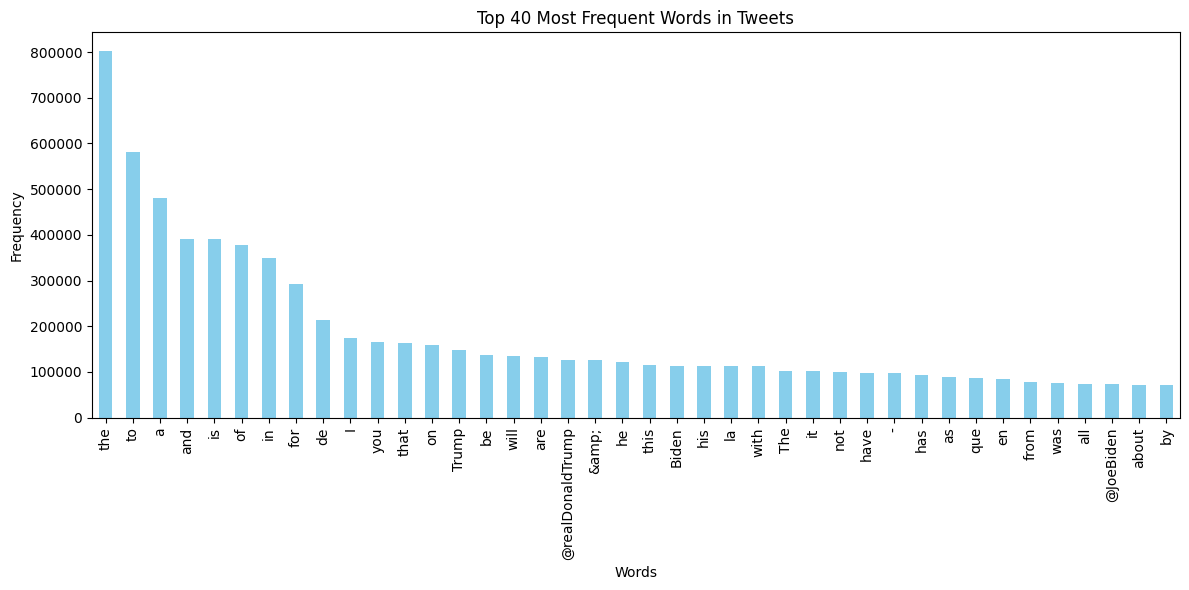

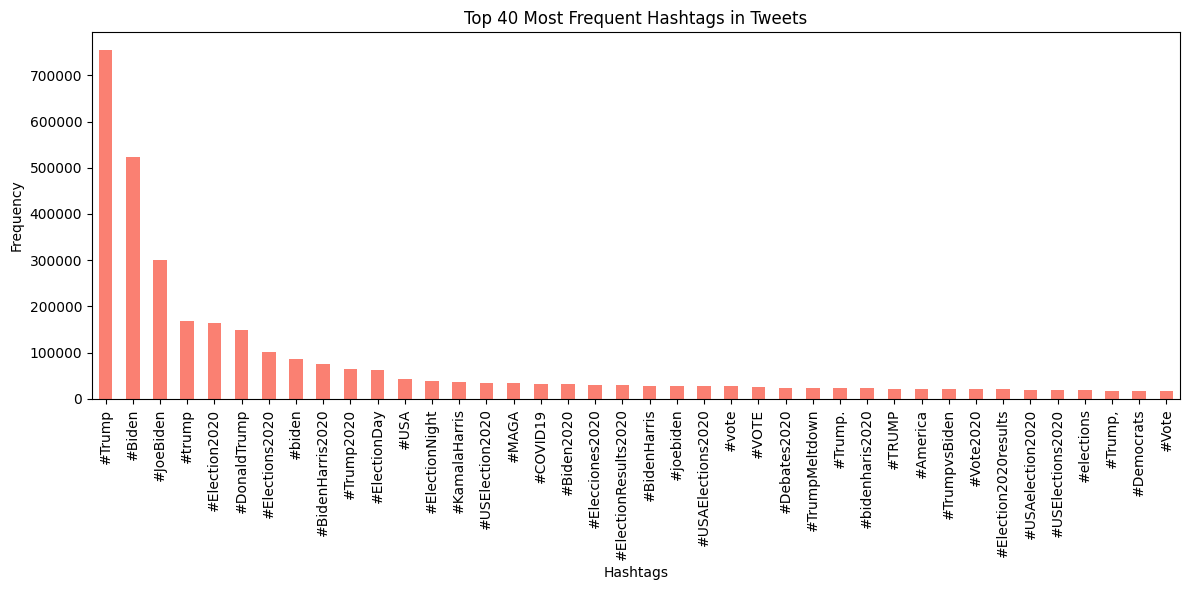

In [7]:
import pandas as pd
import matplotlib.pyplot as plt



# Extract all the words from the 'tweet' column
words = us_election_data['tweet'].str.split().explode()



# Define the number of most frequent words you want to plot
top_n = 40

# Select the top N most frequent words
# Remove hashtags (words starting with "#")
keywords = words[~words.str.startswith('#')]

# Calculate word frequencies
keyword_counts = keywords.value_counts()

top_keywords = keyword_counts.head(top_n)

# Create a bar plot
plt.figure(figsize=(12, 6))
top_keywords.plot(kind='bar', color='skyblue')
plt.title(f'Top {top_n} Most Frequent Words in Tweets')
plt.xlabel('Words')
plt.ylabel('Frequency')
plt.xticks(rotation=90)
plt.tight_layout()

# Show the plot
plt.show()

# Extract hashtags and calculate their frequencies
hashtags = words[words.str.startswith('#')]
hashtag_counts = hashtags.value_counts()

# Select the top N most frequent hashtags
top_hashtags = hashtag_counts.head(top_n)

# Create a bar plot for the most common hashtags
plt.figure(figsize=(12, 6))
top_hashtags.plot(kind='bar', color='salmon')
plt.title(f'Top {top_n} Most Frequent Hashtags in Tweets')
plt.xlabel('Hashtags')
plt.ylabel('Frequency')
plt.xticks(rotation=90)
plt.tight_layout()
plt.savefig('MostFrequentHashtags.png')
plt.show()


In [8]:
print('There are {} rows and {} columns in train'.format(us_election_data.shape[0],us_election_data.shape[1]))
print('There are {} rows and {} columns in train'.format(us_election_data.shape[0],us_election_data.shape[1]))

There are 1747805 rows and 22 columns in train
There are 1747805 rows and 22 columns in train


<a id="section-one-c"></a>
## **Number of Tweets per Day**

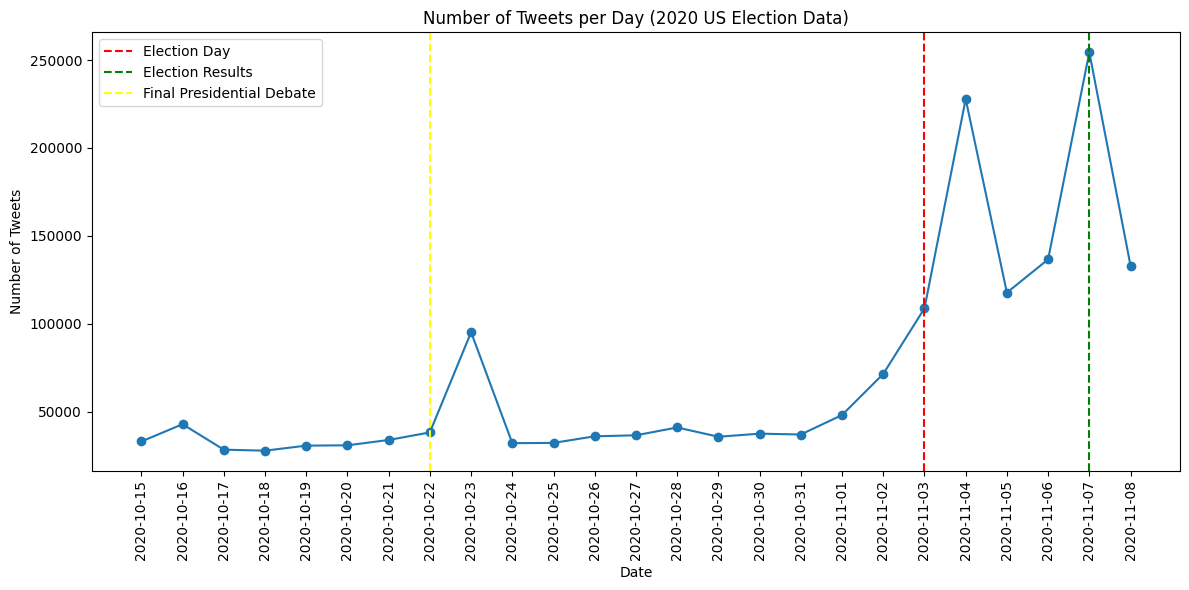

In [9]:
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.dates import DateFormatter

# Assuming us_election_data is your DataFrame with the 'created_at' column
us_election_data['created_at'] = pd.to_datetime(us_election_data['created_at'])  # Convert the 'created_at' column to datetime

# Resample the data by day and count the number of records (tweets)
tweets_per_day = us_election_data.resample('D', on='created_at').size()

# Find the date with the highest number of tweets
date_with_highest_tweets = tweets_per_day.idxmax()

# Create a figure and axis
fig, ax = plt.subplots(figsize=(12,6))

# Plot the data
ax.plot(tweets_per_day.index, tweets_per_day.values, marker='o')

# Set the x-axis format to display only the date
date_formatter = DateFormatter('%Y-%m-%d')
ax.xaxis.set_major_formatter(date_formatter)

# Set the date range from '2020-10-15' to '2020-11-08'
date_range = pd.date_range(start='2020-10-15', end='2020-11-08', freq='D')
all_dates = date_range.tolist()

ax.set_xticks(all_dates)

# Add markers for the 3rd of November and the day with the highest tweets
ax.axvline(pd.Timestamp('2020-11-03'), color='red', linestyle='--', label='Election Day')
ax.axvline(date_with_highest_tweets, color='green', linestyle='--', label='Election Results', linewidth=1.5)
ax.axvline(pd.Timestamp('2020-10-22'), color='yellow', linestyle='--', label='Final Presidential Debate')


ax.legend()

# Rotate the x-axis labels for better visibility
plt.xticks(rotation=90)

# Set labels and title
ax.set_xlabel('Date')
ax.set_ylabel('Number of Tweets')
ax.set_title('Number of Tweets per Day (2020 US Election Data)')

plt.tight_layout()
plt.savefig('2020USElectionTweetSignature.png')
plt.show()




**For Poster**

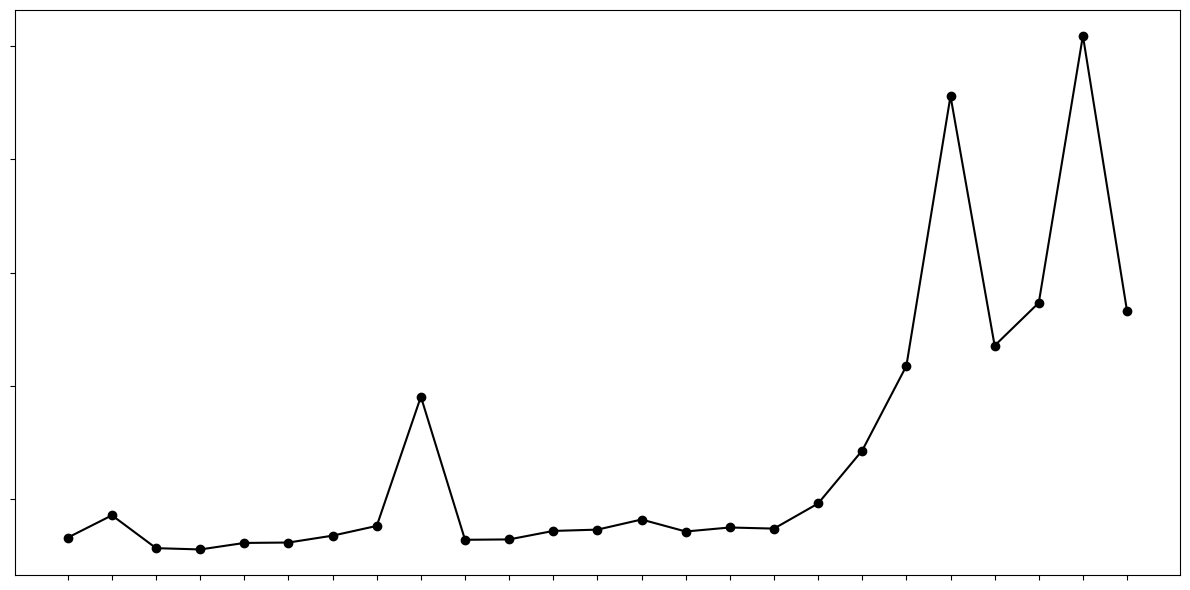

In [10]:
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.dates import DateFormatter

# Assuming us_election_data is your DataFrame with the 'created_at' column
us_election_data['created_at'] = pd.to_datetime(us_election_data['created_at'])  # Convert the 'created_at' column to datetime

# Resample the data by day and count the number of records (tweets)
tweets_per_day = us_election_data.resample('D', on='created_at').size()

# Find the date with the highest number of tweets
date_with_highest_tweets = tweets_per_day.idxmax()

# Create a figure and axis with the desired aspect ratio
fig, ax = plt.subplots(figsize=(12, 6))

# Plot the data without heading, axes titles, x-axis, and y-axis ticks
ax.plot(tweets_per_day.index, tweets_per_day.values, marker='o', color = 'black')

# Set the x-axis format to display only the date
date_formatter = DateFormatter('%Y-%m-%d')
ax.xaxis.set_major_formatter(date_formatter)

# Set the date range from '2020-10-15' to '2020-11-08'
date_range = pd.date_range(start='2020-10-15', end='2020-11-08', freq='D')
all_dates = date_range.tolist()

ax.set_xticks(all_dates)

# # Add markers for the 3rd of November and the day with the highest tweets
# ax.axvline(pd.Timestamp('2020-11-03'), color='red', linestyle='--', label='Election Day')
# ax.axvline(date_with_highest_tweets, color='green', linestyle='--', label='Election Results', linewidth=1.5)
# ax.axvline(pd.Timestamp('2020-10-22'), color='yellow', linestyle='--', label='Final Presidential Debate')

# ax.legend()

# Remove x-axis labels for better visibility
ax.set_xticklabels([])

# Remove y-axis labels and title
ax.set_yticklabels([])
ax.set_title('')

# Save the plot as a PNG file
plt.savefig('EventSignature_Election.png')

plt.tight_layout()
plt.show()


<a id="section-one-d"></a>
## **Location Analysis**

In [11]:
import geopandas as gpd
from shapely.geometry import Point
import pandas as pd

# Load the world map data from the uploaded Shapefile
shapefile_path = '/kaggle/input/natural-earth/ne_110m_admin_0_countries.shp'

# Load the Shapefile into a GeoDataFrame
world = gpd.read_file(shapefile_path)

# Define the Coordinate Reference System (CRS)
crs = world.crs  # Use the CRS from the world map data

# Combine and clean latitude and longitude data
tmp = pd.concat([donald_trump[['lat', 'long']].copy(), joe_biden[['lat', 'long']].copy()])
tmp = tmp.dropna()

# Create Point geometries using Shapely
geometry = [Point(xy) for xy in zip(tmp['long'], tmp['lat'])]

# Create a GeoDataFrame
geo_df = gpd.GeoDataFrame(tmp, crs=crs, geometry=geometry)

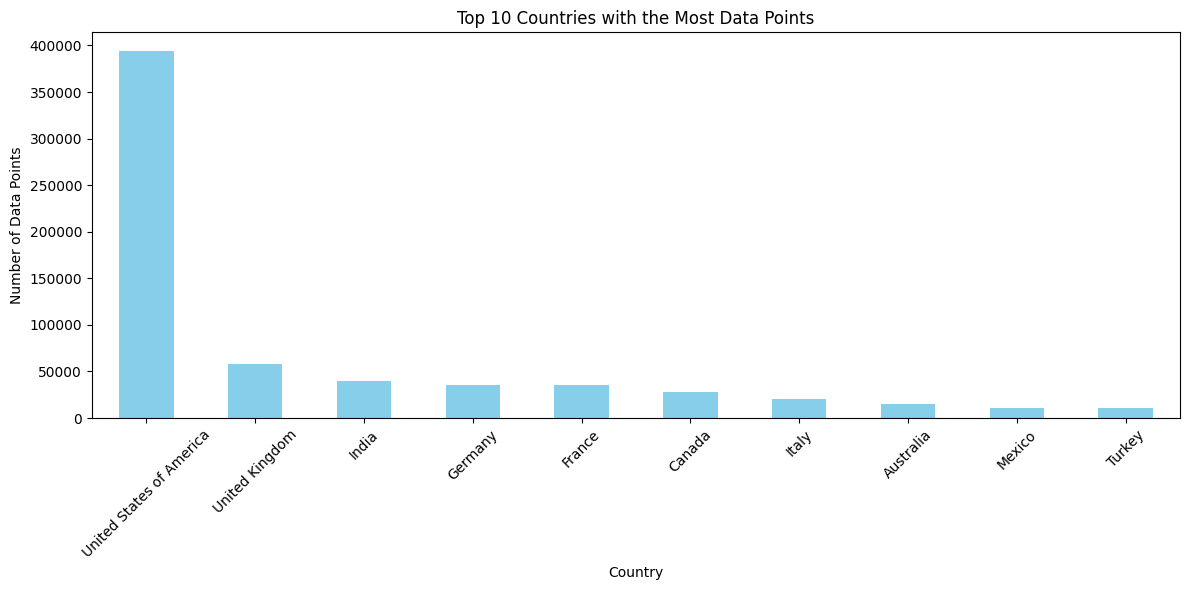

In [12]:
import pandas as pd
import matplotlib.pyplot as plt

us_election_data['country'] = us_election_data['country'].replace({'United States': 'United States of America'})

# Assuming your dataset is named 'geo_df' and it has a 'country' column
top_10_countries = us_election_data['country'].value_counts().nlargest(10)

# Create a bar graph
plt.figure(figsize=(12, 6))
top_10_countries.plot(kind='bar', color='skyblue')
plt.title('Top 10 Countries with the Most Data Points')
plt.xlabel('Country')
plt.ylabel('Number of Data Points')
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.tight_layout()
plt.show()


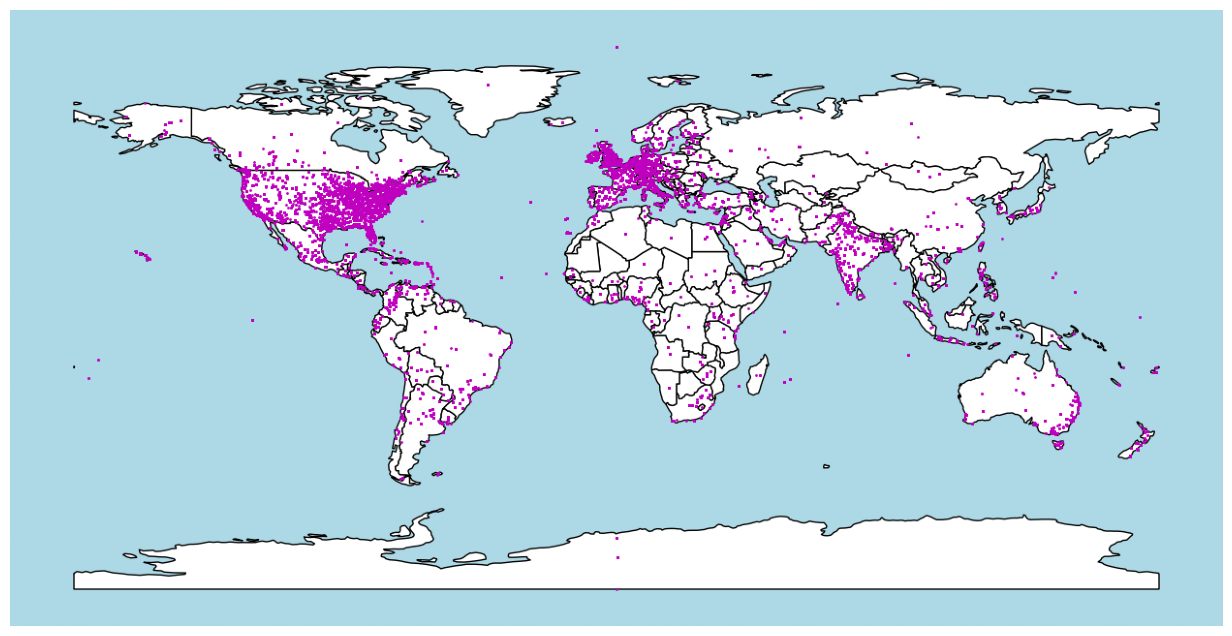

In [13]:
import os
import matplotlib.pyplot as plt

# Define the file path
file_path = '/kaggle/input/us-election-tweet-location/US_Election_tweet_location.png'

try:
    # Check if the file exists
    if os.path.exists(file_path):
        # Load and display the image
        img = plt.imread(file_path)

        # Set the figure size with a larger width
        plt.figure(figsize=(20, 8))  # You can adjust the width (20) as needed

        plt.imshow(img)
        plt.axis('off')
        plt.savefig('LocationOfTweetsOnMap.png')
        plt.show()
    else:
        # Create subplots if the file doesn't exist
        fig, ax = plt.subplots(1, figsize=(16, 8), facecolor='lightblue')

        # Plot the world map with white color
        world.plot(ax=ax, color='white', edgecolor='black')

        # Plot your geo_df data
        geo_df.plot(ax=ax, markersize=1, color='m', marker='o')

        # Turn off the axis
        ax.axis('off')

        # Save the plot to the specified file path
        plt.savefig(file_path, bbox_inches='tight')
        
        plt.savefig('LocationOfTweetsOnMap.png')

        # Show the plot (optional, can be removed if you only want to save the image)
        plt.show()
except Exception as e:
    print(f"The following error has occurred: {e}")


<a id="section-two"></a>
# **2. GDELT Analysis**

<a id="section-two-a"></a>
## **GDELT Description**

The Global Database of Events, Language, and Tone (GDELT) is a comprehensive and continuously updated dataset that monitors and records various global events, news articles, and media sources from around the world. GDELT's primary purpose is to provide a vast repository of structured data that researchers, analysts, and data scientists can use to analyze and gain insights into global events, trends, and sentiments.
​
Key features of GDELT include:
​
- **Event Data**: GDELT captures a wide range of events, including political, economic, social, and cultural events, across different countries and regions.
​
- **Media Monitoring**: GDELT scans thousands of news articles, broadcasts, and online sources in multiple languages to extract valuable information.
​
- **Sentiment Analysis**: It includes sentiment analysis and tone indicators, helping to understand the emotional context of news and events.
​
- **Temporal Coverage**: GDELT's data goes back several decades, allowing users to explore historical trends and patterns.
​
- **Geospatial Information**: The dataset includes geospatial information, enabling the mapping of events and their locations.


https://www.gdeltproject.org/
​
                                                                                                                                  

<a id="section-two-b"></a>
## **GDELT Exploratory Data Analysis (EDA)**

In [14]:
import pandas as pd

 

# Create the full file path
file_path = "/kaggle/input/gdelt-us-elections-8-oct-to-10-nov/GDELT-US-ElectionsV2_2000002days.csv"

 

# Load the dataset into a Pandas DataFrame
try:
    df = pd.read_csv(file_path, low_memory=False)
    
    # Display the main specifications of the dataset
    print("Dataset Specifications:")
    print(f"File Path: {file_path}")
    print(f"Number of Rows: {len(df)}")
    print(f"Number of Columns: {len(df.columns)}")
    print("Column Names:")
    for column in df.columns:
        print(f" - {column}")
    print("Data Types:")
    for column, dtype in df.dtypes.items():
        print(f" - {column}: {dtype}")
#     print("Summary Statistics:")
#     print(df.describe())
except FileNotFoundError:
    print(f"File '{file_path}' not found.")
except Exception as e:
    print(f"An error occurred: {str(e)}")
df.head()

Dataset Specifications:
File Path: /kaggle/input/gdelt-us-elections-8-oct-to-10-nov/GDELT-US-ElectionsV2_2000002days.csv
Number of Rows: 212710
Number of Columns: 61
Column Names:
 - GLOBALEVENTID
 - SQLDATE
 - MonthYear
 - Year
 - FractionDate
 - Actor1Code
 - Actor1Name
 - Actor1CountryCode
 - Actor1KnownGroupCode
 - Actor1EthnicCode
 - Actor1Religion1Code
 - Actor1Religion2Code
 - Actor1Type1Code
 - Actor1Type2Code
 - Actor1Type3Code
 - Actor2Code
 - Actor2Name
 - Actor2CountryCode
 - Actor2KnownGroupCode
 - Actor2EthnicCode
 - Actor2Religion1Code
 - Actor2Religion2Code
 - Actor2Type1Code
 - Actor2Type2Code
 - Actor2Type3Code
 - IsRootEvent
 - EventCode
 - EventBaseCode
 - EventRootCode
 - QuadClass
 - GoldsteinScale
 - NumMentions
 - NumSources
 - NumArticles
 - AvgTone
 - Actor1Geo_Type
 - Actor1Geo_FullName
 - Actor1Geo_CountryCode
 - Actor1Geo_ADM1Code
 - Actor1Geo_ADM2Code
 - Actor1Geo_Lat
 - Actor1Geo_Long
 - Actor1Geo_FeatureID
 - Actor2Geo_Type
 - Actor2Geo_FullName
 - Actor

,GLOBALEVENTID,SQLDATE,MonthYear,Year,FractionDate,Actor1Code,Actor1Name,Actor1CountryCode,Actor1KnownGroupCode,Actor1EthnicCode,...,ActionGeo_Type,ActionGeo_FullName,ActionGeo_CountryCode,ActionGeo_ADM1Code,ActionGeo_ADM2Code,ActionGeo_Lat,ActionGeo_Long,ActionGeo_FeatureID,DATEADDED,SOURCEURL
0,952183148,20201018,202010,2020,2020.7890,NaN,NaN,NaN,NaN,NaN,...,2,"Alabama, United States",US,USAL,NaN,32.7990,-86.8073,AL,20201018211500,https://www.breitbart.com/politics/2020/10/18/...
1,952189418,20201019,202010,2020,2020.7918,NaN,NaN,NaN,NaN,NaN,...,2,"Arizona, United States",US,USAZ,NaN,33.7712,-111.3880,AZ,20201019001500,https://www.kunc.org/npr-news/2020-10-18/biden...
2,952784179,20201023,202010,2020,2020.8027,NaN,NaN,NaN,NaN,NaN,...,2,"Arizona, United States",US,USAZ,NaN,33.7712,-111.3880,AZ,20201023081500,http://www.dailyjournal.net/2020/10/23/ap-us-e...
3,951939742,20201016,202010,2020,2020.7836,NaN,NaN,NaN,NaN,NaN,...,2,"Arizona, United States",US,USAZ,NaN,33.7712,-111.3880,AZ,20201016103000,https://www.huffpost.com/entry/democrats-flip-...
4,953202878,20201027,202010,2020,2020.8137,NaN,NaN,NaN,NaN,NaN,...,3,"Phoenix, Arizona, United States",US,USAZ,AZ013,33.4484,-112.0740,44784,20201027104500,http://www.msn.com/en-us/news/politics/2020-el...


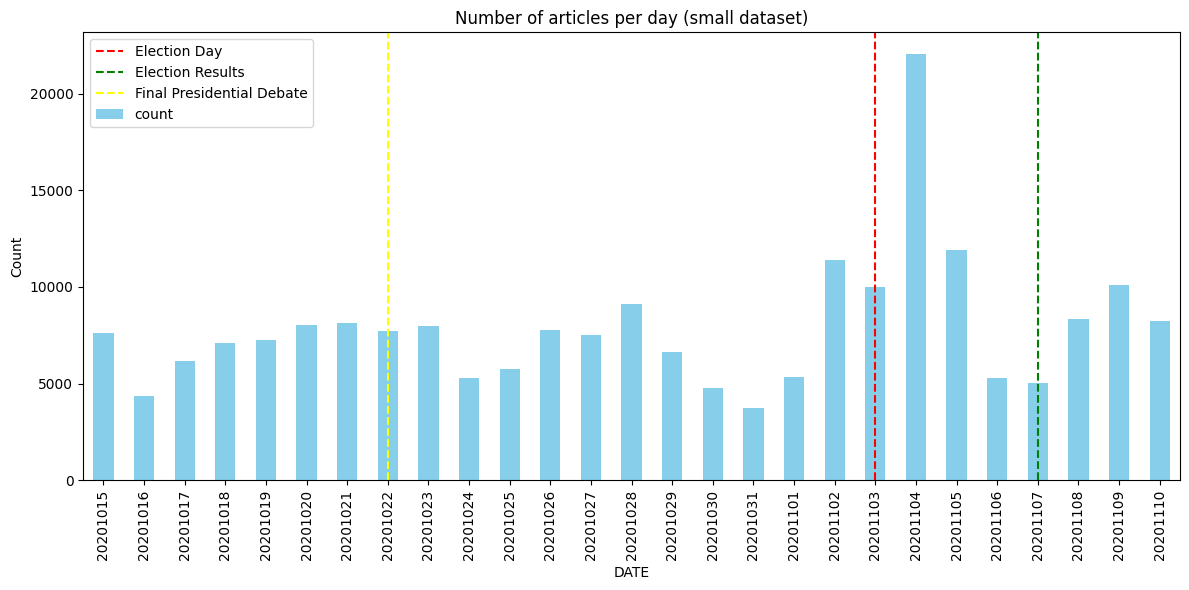

In [15]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# Load the dataset
df = pd.read_csv(file_path, low_memory=False)

# Convert 'SQLDATE' column to a string with 'YYYYMMDD' format
df['SQLDATE'] = df['SQLDATE'].astype(str)

# Group the data by SQLDATE and count the number of data points for each date
date_counts = df['SQLDATE'].value_counts().sort_index()

# Create a bar graph
plt.figure(figsize=(12, 6))
date_counts.plot(kind='bar', color='skyblue')
plt.title('Number of articles per day (small dataset)')
plt.xlabel('DATE')
plt.ylabel('Count')

# Set the x-axis ticks to match the SQLDATE values
dates_to_highlight = ["20201103", "20201107", "20201022"]  # Add your desired dates here
title_of_dates = ["Election Day", "Election Results", "Final Presidential Debate"]
colors = ["red", "green", "yellow"]

# Calculate the positions for evenly spaced x-axis ticks
x_positions = np.arange(len(date_counts))

for i, date in enumerate(dates_to_highlight):
    title = title_of_dates[i]
    color = colors[i]
    position = date_counts.index.get_loc(date)
    plt.axvline(x=position, color=color, linestyle='--', label=title)

plt.xticks(x_positions, date_counts.index, rotation=90)  # Set x-axis ticks
plt.legend()  # Add a legend to show the highlighted dates
plt.tight_layout()
plt.show()

<a id="section-two-c"></a>
## **Total Number of Mentions per day**



**Definition of NumMentions:**
NumMentions=	(NULLABLE;	INTEGER)	This is the total number of mentions of this event across all source documents during the 15 minute update in which it was first seen. Multiple references to an event within a single document also contribute to this count. This can be used as a method of assessing the “importance” of an event: the more discussion of that event, the more likely it is to be significant. The total universe of source documents and the density of events within them vary over time, so it is recommended that this field be normalized by the average or other measure of the universe of events during the time period of interest. This field is actually a composite score of the total number of raw mentions and the number of mentions extracted from reprocessed versions of each article (see the discussion for the Mentions table). NOTE: this field refers only to the first news report to mention an event and is not updated if the event is found in a different context in other news reports. It is included for legacy purposes – for more precise information on the positioning of an event, see the Mentions table.

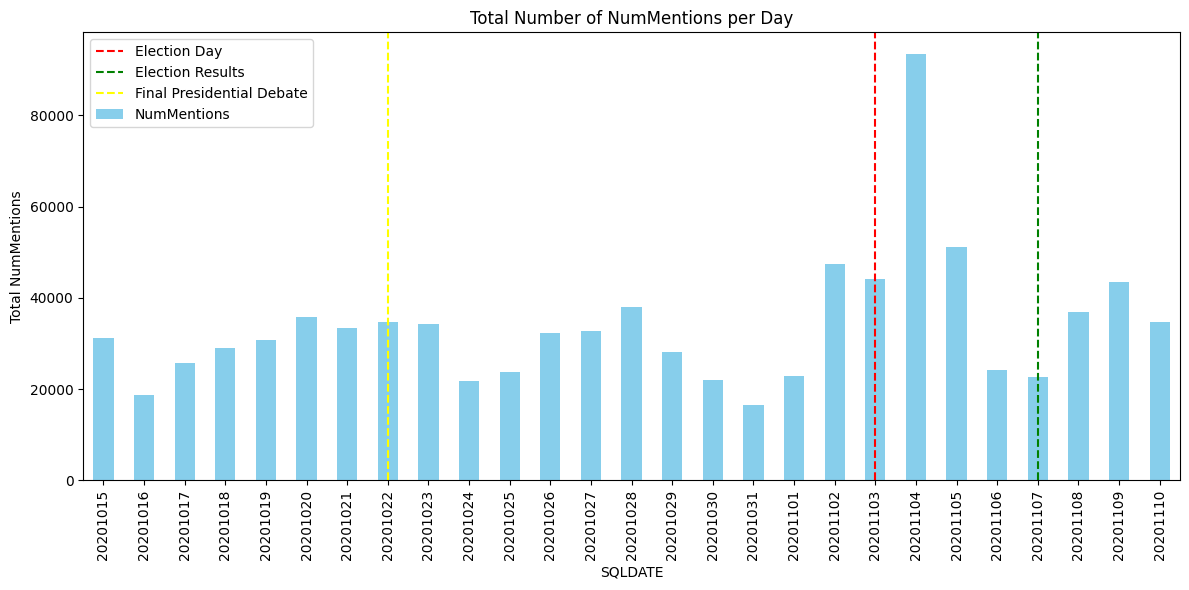

In [16]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the dataset

df = pd.read_csv(file_path, low_memory=False)

# Group the data by SQLDATE and sum the NumMentions for each date
date_mentions = df.groupby('SQLDATE')['NumMentions'].sum()

# Create a bar graph
plt.figure(figsize=(12, 6))
date_mentions.plot(kind='bar', color='skyblue')
plt.title('Total Number of NumMentions per Day')
plt.xlabel('SQLDATE')
plt.ylabel('Total NumMentions')

# Set the x-axis ticks to match the SQLDATE values
dates_to_highlight = ["20201103", "20201107", "20201022"]  # Add your desired dates here
title_of_dates = ["Election Day", "Election Results", "Final Presidential Debate"]
colors = ["red", "green", "yellow"]

# Calculate the positions for evenly spaced x-axis ticks
x_positions = np.arange(len(date_counts))

for i, date in enumerate(dates_to_highlight):
    title = title_of_dates[i]
    color = colors[i]
    position = date_counts.index.get_loc(date)
    plt.axvline(x=position, color=color, linestyle='--', label=title)

plt.xticks(rotation=90)
plt.legend()  # Add a legend to show the highlighted dates
plt.tight_layout()
plt.show()

<a id="section-two-d"></a>
## **GDELT Sentiment Analysis**

**Distribution of sentiment of articles**
This uses the the column title AvgTone to gauge the sentiment.

**Definition of AvgTone:**
AvgTone=	(NULLABLE;	FLOAT)	This is the average “tone” of all documents containing one or more mentions of this event during the 15 minute update in which it was first seen. The score ranges from -100 (extremely negative) to +100 (extremely positive). Common values range between -10 and +10, with 0 indicating neutral. This can be used as a method of filtering the “context” of events as a subtle measure of the importance of an event and as a proxy for the “impact” of that event. For example, a riot event with a slightly negative average tone is likely to have been a minor occurrence, whereas if it had an extremely negative average tone, it suggests a far more serious occurrence. A riot with a positive score likely suggests a very minor occurrence described in the context of a more positive narrative (such as a report of an attack occurring in a discussion of improving conditions on the ground in a country and how the number of attacks per day has been greatly reduced). NOTE: this field refers only to the first news report to mention an event and is not updated if the event is found in a different context in other news reports. It is included for legacy purposes – for more precise information on the positioning of an event, see the Mentions table. NOTE: this provides only a basic tonal assessment of an article and it is recommended that users interested in emotional measures use the Mentions and Global Knowledge Graph tables to merge the complete set of 2,300 emotions and themes from the GKG GCAM system into their analysis of event records. (Source: GDELT database)

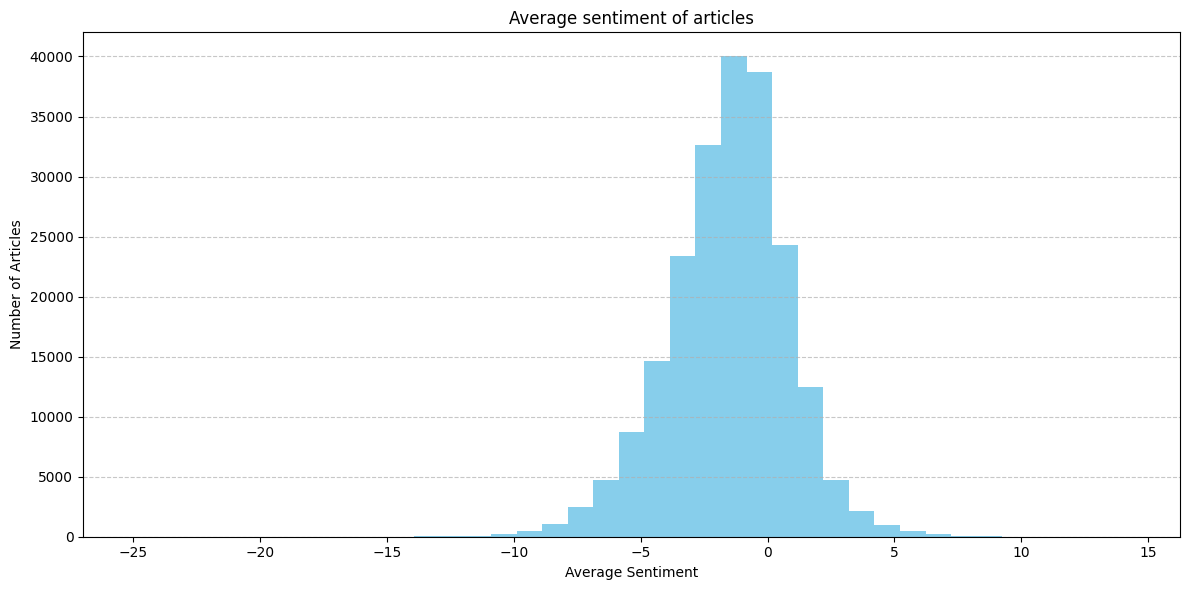

In [17]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the dataset

df = pd.read_csv(file_path, low_memory=False)

# Create a histogram of AvgTone with a bin width of 1 unit
bin_width = 1.0
plt.figure(figsize=(12, 6))
plt.hist(df['AvgTone'], bins=int((df['AvgTone'].max() - df['AvgTone'].min()) / bin_width), color='skyblue')
plt.title('Average sentiment of articles')
plt.xlabel('Average Sentiment')
plt.ylabel('Number of Articles')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

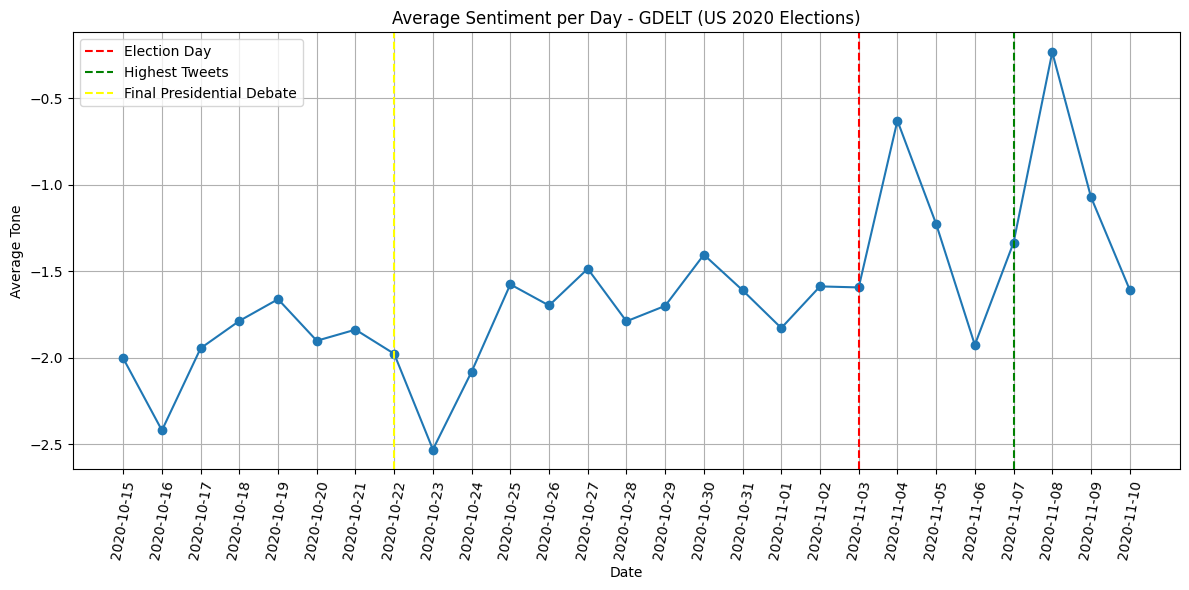

In [18]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the dataset

df = pd.read_csv(file_path, parse_dates=['SQLDATE'], low_memory=False)

# Group the data by date and calculate the average sentiment (AvgTone) for each day
average_sentiment_per_day = df.groupby('SQLDATE')['AvgTone'].mean()

# Plot the average sentiment over time
plt.figure(figsize=(12, 6))
plt.plot(average_sentiment_per_day.index, average_sentiment_per_day.values, marker='o', linestyle='-')
plt.title('Average Sentiment per Day - GDELT (US 2020 Elections)')
plt.xlabel('Date')
plt.ylabel('Average Tone')
plt.grid(True)

# Set the date range from '2020-10-15' to '2020-11-08'
date_range = pd.date_range(start='2020-10-15', end='2020-11-10', freq='D')
all_dates = date_range.tolist()

# Set the x-axis ticks to match the SQLDATE values
dates_to_highlight = ["2020-11-03", "2020-11-07", "2020-10-22"]  # Add your desired dates here
title_of_dates = ["Election Day", "Highest Tweets", "Final Presidential Debate"]
colors = ["red", "green", "yellow"]

# Calculate the positions for evenly spaced x-axis ticks
x_positions = [average_sentiment_per_day.index.get_loc(date) for date in dates_to_highlight]

for i, date in enumerate(dates_to_highlight):
    title = title_of_dates[i]
    color = colors[i]
    date_current = dates_to_highlight[i]
    position = pd.Timestamp(date_current)
    plt.axvline(x=position, color=color, linestyle='--', label=title)

# Set the x-axis ticks to be all_dates and their labels
plt.xticks(all_dates, [date.strftime('%Y-%m-%d') for date in all_dates], rotation=45)

plt.xticks(rotation=80)
# Show the plot
plt.tight_layout()
plt.legend()
plt.show()


**Goldstein Scale of events: US E event**

**Definintion of Goldstein Scale:**
GoldsteinScale=	(NULLABLE;	FLOAT)	Each CAMEO event code is assigned a numeric score from -10 to +10, capturing the theoretical potential impact that type of event will have on the stability of a country. This is known as the Goldstein Scale. This field specifies the Goldstein score for each event type. NOTE: this score is based on the type of event, not the specifics of the actual event record being recorded – thus two riots, one with 10 people and one with 10,000, will both receive the same Goldstein score. This can be aggregated to various levels of time resolution to yield an approximation of the stability of a location over time. (Source GDELT Database - BigQuery)

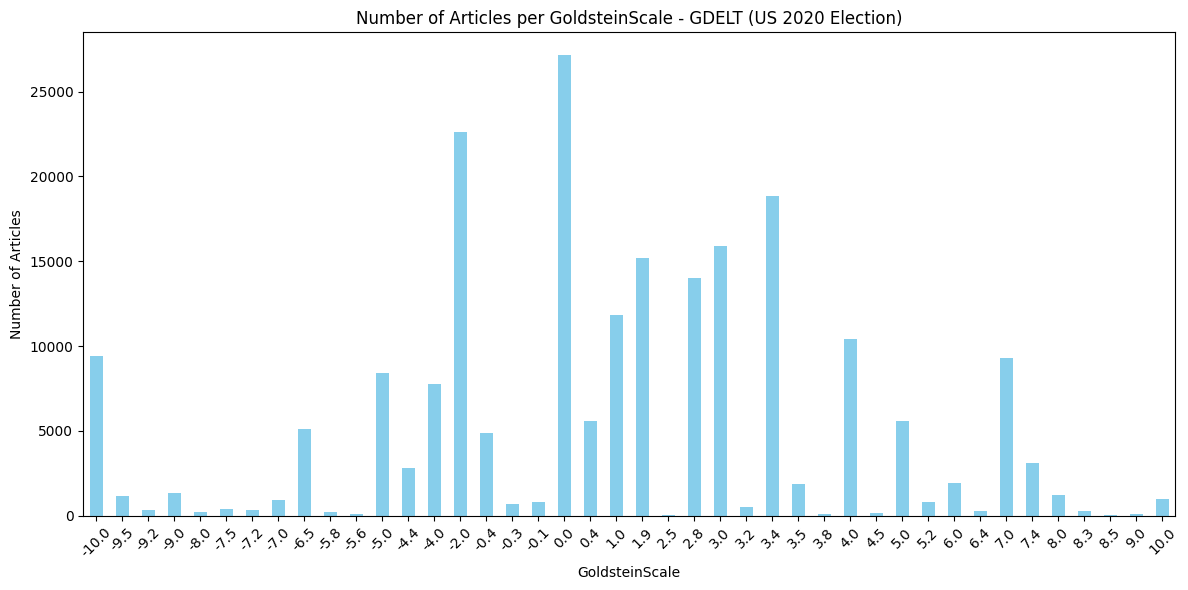

In [19]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the dataset

df = pd.read_csv(file_path, low_memory=False)

# Group the data by GoldsteinScale and count the number of articles for each scale value
goldstein_counts = df['GoldsteinScale'].value_counts().sort_index()

# Create a bar graph
plt.figure(figsize=(12, 6))
goldstein_counts.plot(kind='bar', color='skyblue')
plt.title('Number of Articles per GoldsteinScale - GDELT (US 2020 Election)')
plt.xlabel('GoldsteinScale')
plt.ylabel('Number of Articles')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [20]:
import pandas as pd

# Load the dataset

df = pd.read_csv(file_path, low_memory=False)

# Group by 'GoldsteinScale' and calculate the percentage for each unique value
result_table = df['GoldsteinScale'].value_counts(normalize=True).reset_index()
result_table.columns = ['GoldsteinScale Value', 'Percentage of Dataset']
result_table['Percentage of Dataset'] = result_table['Percentage of Dataset'] * 100

print(result_table)


    GoldsteinScale Value  Percentage of Dataset
0                    0.0              12.757275
1                   -2.0              10.624794
2                    3.4               8.852428
3                    3.0               7.465093
4                    1.9               7.149170
5                    2.8               6.578910
6                    1.0               5.570025
7                    4.0               4.888346
8                  -10.0               4.426214
9                    7.0               4.379202
10                  -5.0               3.941046
11                  -4.0               3.653801
12                   0.4               2.620939
13                   5.0               2.611537
14                  -6.5               2.412675
15                  -0.4               2.301255
16                   7.4               1.450331
17                  -4.4               1.321988
18                   6.0               0.907339
19                   3.5               0

<a id="section-three"></a>
# **3. Google Trends Data Analysis**

 
<a id="section-three-a"></a>
## **Google Trends Description**

Google Trends is a powerful tool provided by Google for analyzing the popularity of search terms and topics over time. It offers insights into search interest, allowing users to compare and explore keywords on Google's search engine.

## Key Features

Google Trends provides:

- **Search Term Comparison**: Compare multiple terms simultaneously.
- **Time Range Selection**: Analyze trends over different time periods.
- **Location-Based Insights**: Examine regional variations in search trends.
- **Related Queries**: Discover related topics for deeper insights.

## Normalization

Google Trends uses normalization to ensure accurate data representation. It scales search interest data to a relative scale of 0 to 100, considers the chosen time period, and provides regionally adjusted data. This simplifies data interpretation for marketers, researchers, and analysts.

## Functionalities

This analysis utilizes the **Web search** and **News search** functionalities of Google Trends.


For the Google Trends analysis conducted, we focused on the search interest of three key keywords:

1. **Trump**
2. **Biden**
3. **US Election**

These keywords were selected to examine the search interest and popularity trends surrounding the 2020 U.S. Presidential Election.

<a id="section-three-b"></a>
## **Web Search**


[Google Trends Analysis: Trump, Biden, and US Election](https://trends.google.com/trends/explore?date=2020-10-15%202020-11-10&q=Trump,Biden,US%20Election)




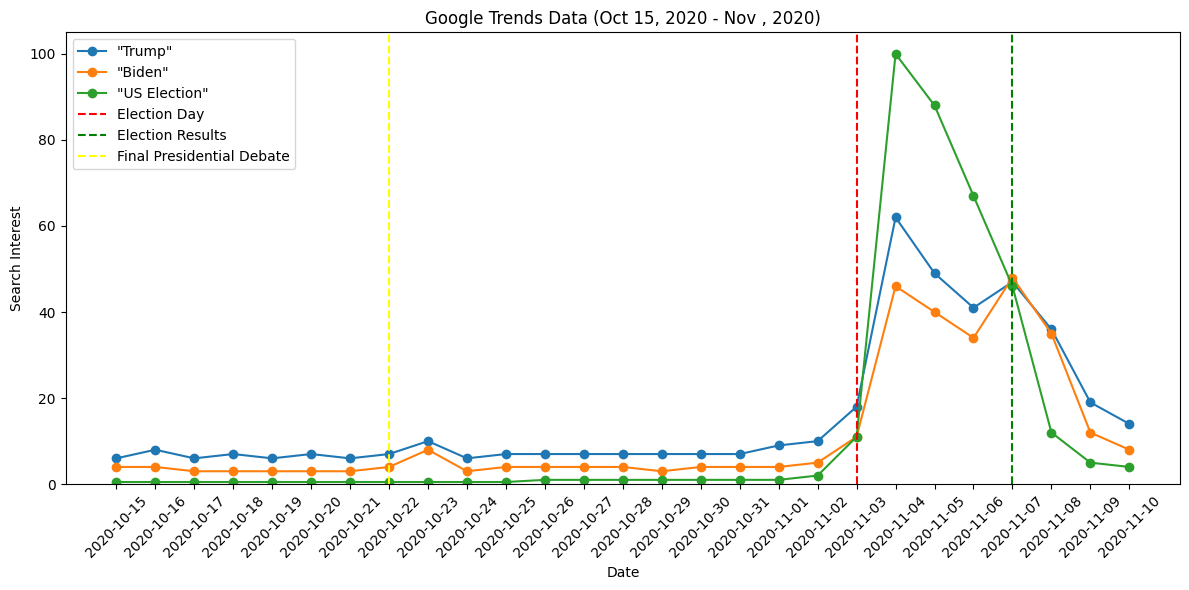

In [21]:
import pandas as pd
import matplotlib.pyplot as plt
from io import StringIO

# Create a string with the CSV data
csv_data = """Day,Trump: (Worldwide),Biden: (Worldwide),US Election: (Worldwide)
2020-10-15,6,4,<1
2020-10-16,8,4,<1
2020-10-17,6,3,<1
2020-10-18,7,3,<1
2020-10-19,6,3,<1
2020-10-20,7,3,<1
2020-10-21,6,3,<1
2020-10-22,7,4,<1
2020-10-23,10,8,<1
2020-10-24,6,3,<1
2020-10-25,7,4,<1
2020-10-26,7,4,1
2020-10-27,7,4,1
2020-10-28,7,4,1
2020-10-29,7,3,1
2020-10-30,7,4,1
2020-10-31,7,4,1
2020-11-01,9,4,1
2020-11-02,10,5,2
2020-11-03,18,11,11
2020-11-04,62,46,100
2020-11-05,49,40,88
2020-11-06,41,34,67
2020-11-07,47,48,46
2020-11-08,36,35,12
2020-11-09,19,12,5
2020-11-10,14,8,4"""

# Create a DataFrame from the CSV data
df = pd.read_csv(StringIO(csv_data))

# Convert "<1" values to 0.5 (or any appropriate value)
df = df.replace('<1', 0.5)

# Convert "Day" column to datetime
df['Day'] = pd.to_datetime(df['Day'])

trump_web_df = pd.DataFrame({'Day': df['Day'], 'Trump': df['Trump: (Worldwide)']})
biden_web_df = pd.DataFrame({'Day': df['Day'], 'Biden': df['Biden: (Worldwide)']})
us_election_web_df = pd.DataFrame({'Day': df['Day'], 'US Election': df['US Election: (Worldwide)']})

# Create a figure and axis
fig, ax = plt.subplots(figsize=(12, 6))

# Plot the data
plt.plot(df['Day'], df['Trump: (Worldwide)'], label='"Trump"', marker='o')
plt.plot(df['Day'], df['Biden: (Worldwide)'], label='"Biden"', marker='o')
plt.plot(df['Day'], df['US Election: (Worldwide)'], label='"US Election"', marker='o')

# Set y-axis range from 0 to 100
plt.ylim(0, 105)

# Set x-axis ticks to match the dates
plt.xticks(df['Day'], rotation=45)

# Add vertical lines for specific dates
dates_to_highlight = ["2020-11-03", "2020-11-07", "2020-10-22"]  # Add your desired dates here
title_of_dates = ["Election Day", "Election Results", "Final Presidential Debate"]
colors = ["red", "green", "yellow"]

for date_to_highlight, color, title in zip(dates_to_highlight, colors, title_of_dates):
    ax.axvline(pd.to_datetime(date_to_highlight), color=color, linestyle='--', label=title)

# Merge both legends into a single legend
legend = ax.legend(loc='upper left')

# Add labels and title
plt.xlabel('Date')
plt.ylabel('Search Interest')
plt.title('Google Trends Data (Oct 15, 2020 - Nov , 2020)')

# Show the plot
plt.tight_layout()
plt.show()

<a id="section-three-c"></a>
## **News Search**


[Google Trends Analysis: Trump, Biden, and US Election](https://trends.google.com/trends/explore?date=2020-10-15%202020-11-10&gprop=news&q=Trump,Biden,US%20Election)

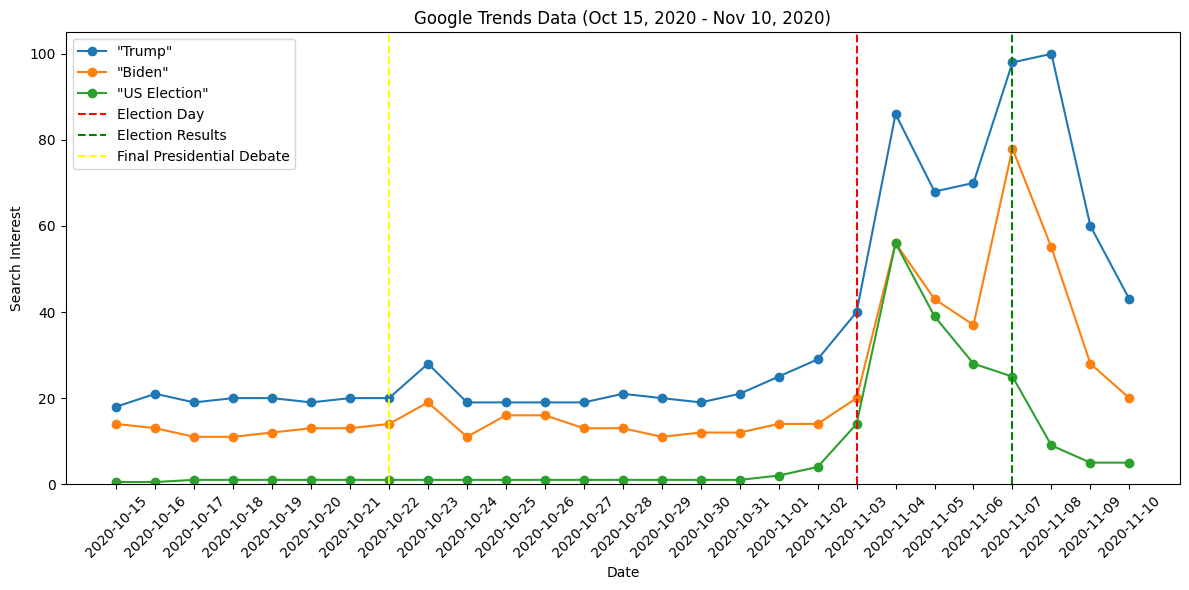

In [22]:
import pandas as pd
import matplotlib.pyplot as plt
from io import StringIO

# Create a string with the CSV data
csv_data = """Day,Trump: (Worldwide),Biden: (Worldwide),US Election: (Worldwide)
2020-10-15,18,14,<1
2020-10-16,21,13,<1
2020-10-17,19,11,1
2020-10-18,20,11,1
2020-10-19,20,12,1
2020-10-20,19,13,1
2020-10-21,20,13,1
2020-10-22,20,14,1
2020-10-23,28,19,1
2020-10-24,19,11,1
2020-10-25,19,16,1
2020-10-26,19,16,1
2020-10-27,19,13,1
2020-10-28,21,13,1
2020-10-29,20,11,1
2020-10-30,19,12,1
2020-10-31,21,12,1
2020-11-01,25,14,2
2020-11-02,29,14,4
2020-11-03,40,20,14
2020-11-04,86,56,56
2020-11-05,68,43,39
2020-11-06,70,37,28
2020-11-07,98,78,25
2020-11-08,100,55,9
2020-11-09,60,28,5
2020-11-10,43,20,5
"""

# Create a DataFrame from the CSV data
df = pd.read_csv(StringIO(csv_data))

# Convert "<1" values to 0.5 (or any appropriate value)
df = df.replace('<1', 0.5)

# Convert "Day" column to datetime
df['Day'] = pd.to_datetime(df['Day'])

# Create DataFrames for each curve
trump_news_df = pd.DataFrame({'Day': df['Day'], 'Trump': df['Trump: (Worldwide)']})
biden_news_df = pd.DataFrame({'Day': df['Day'], 'Biden': df['Biden: (Worldwide)']})
us_election_news_df = pd.DataFrame({'Day': df['Day'], 'US Election': df['US Election: (Worldwide)']})

# Create a figure and axis
fig, ax = plt.subplots(figsize=(12, 6))

# Plot the data
plt.plot(df['Day'], df['Trump: (Worldwide)'], label='"Trump"', marker='o')
plt.plot(df['Day'], df['Biden: (Worldwide)'], label='"Biden"', marker='o')
plt.plot(df['Day'], df['US Election: (Worldwide)'], label='"US Election"', marker='o')

# Set y-axis range from 0 to 100
plt.ylim(0, 105)

# Set x-axis ticks to match the dates
plt.xticks(df['Day'], rotation=45)

# Add vertical lines for specific dates
dates_to_highlight = ["2020-11-03", "2020-11-07", "2020-10-22"]  # Add your desired dates here
title_of_dates = ["Election Day", "Election Results", "Final Presidential Debate"]
colors = ["red", "green", "yellow"]

for date_to_highlight, color, title in zip(dates_to_highlight, colors, title_of_dates):
    ax.axvline(pd.to_datetime(date_to_highlight), color=color, linestyle='--', label=title)

# Merge both legends into a single legend
legend = ax.legend(loc='upper left')

# Add labels and title
plt.xlabel('Date')
plt.ylabel('Search Interest')
plt.title('Google Trends Data (Oct 15, 2020 - Nov 10, 2020)')

# Show the plot
plt.tight_layout()
plt.show()


<a id="section-four"></a>
# **4. Pattern of Interest Comparisons**

<a id="section-four-a"></a>
## **Comparison of Number of Tweets and GDELT Articles per Day**




Weekend Days:
[[Timestamp('2020-10-17 00:00:00'), Timestamp('2020-10-19 00:00:00')], [Timestamp('2020-10-24 00:00:00'), Timestamp('2020-10-26 00:00:00')], [Timestamp('2020-10-31 00:00:00'), Timestamp('2020-11-02 00:00:00')], [Timestamp('2020-11-07 00:00:00'), Timestamp('2020-11-09 00:00:00')]]


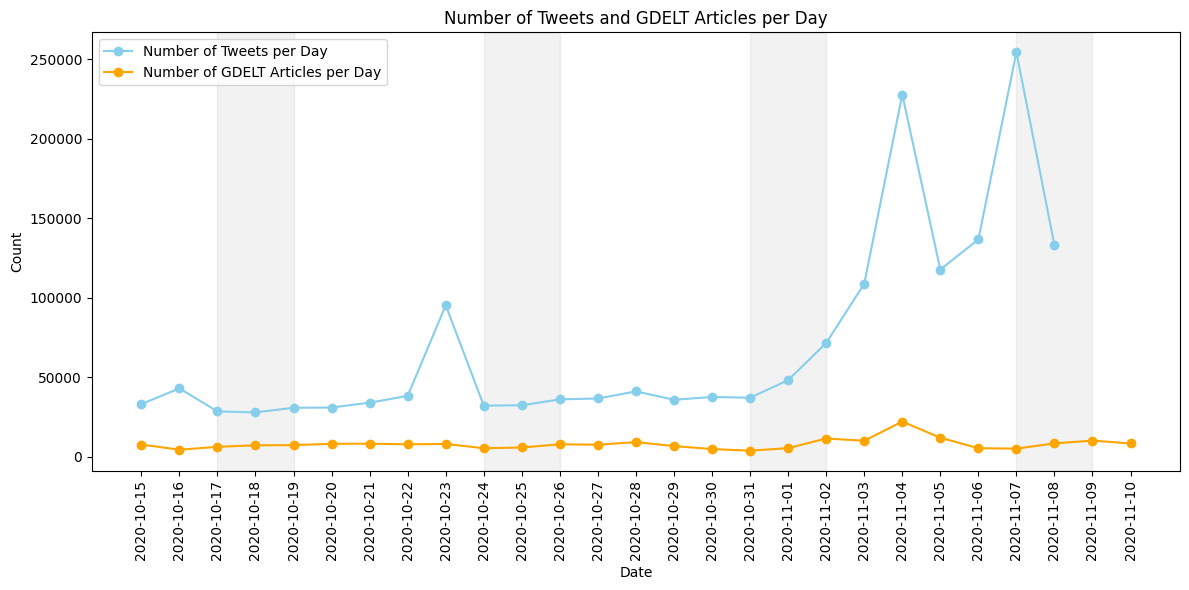

In [23]:
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.dates import DateFormatter
from datetime import datetime, timedelta

# Assuming unrest_tweets2 is your DataFrame with the 'date' column (format from (1))

# Load the dataset from (2)
GDELT_file_path = "/kaggle/input/gdelt-us-elections-8-oct-to-10-nov/GDELT-US-ElectionsV2_2000002days.csv"
GDELT_data = pd.read_csv(GDELT_file_path, low_memory=False)


# # Assuming us_election_data is your DataFrame with the 'created_at' column
# donald_trump = pd.read_csv('/kaggle/input/us-election-2020-tweets/hashtag_donaldtrump.csv', lineterminator='\n')
# donald_trump.loc[:,'Candidate'] = 'Donald Trump'
# joe_biden = pd.read_csv('/kaggle/input/us-election-2020-tweets/hashtag_joebiden.csv', lineterminator='\n')
# joe_biden.loc[:,'Candidate'] = 'Joe Biden'
# us_election_data = pd.concat([joe_biden,donald_trump])
# us_election_data['created_at'] = pd.to_datetime(us_election_data['created_at'])  # Convert the 'created_at' column to datetime

# Resample the data by day and count the number of records (tweets)
tweets_per_day = us_election_data.resample('D', on='created_at').size()

# Group the data by SQLDATE and count the number of data points for each date
date_counts = GDELT_data['SQLDATE'].value_counts().sort_index()

# Convert SQLDATE to the same datetime format as in (1)
date_counts.index = pd.to_datetime(date_counts.index, format='%Y%m%d')

# Create a figure and axis
fig, ax = plt.subplots(figsize=(12, 6))

# Plot the first dataset (from (1))
ax.plot(tweets_per_day.index, tweets_per_day.values, marker='o', label='Number of Tweets per Day', color='skyblue')

# Plot the second dataset (converted from SQLDATE)
ax.plot(date_counts.index, date_counts.values, marker='o', label='Number of GDELT Articles per Day', color='orange')


# Set the x-axis format to display only the date
date_formatter = DateFormatter('%Y-%m-%d')
ax.xaxis.set_major_formatter(date_formatter)

# Set the dates starting from the beginning of the event:
specific_dates = [pd.Timestamp('2020-10-15')]
date_range = pd.date_range(start='2020-10-16', end='2020-11-10', freq='D')
all_dates = specific_dates + date_range.tolist()

# Initialize an empty list to store weekend dates
weekend_dates = []

# Iterate through all dates and check if they are weekends
for i in range(len(all_dates)):
    date = all_dates[i]
    if i == 0 and date.dayofweek == 6:
        weekend_dates.append([date,date + timedelta(days=1)])
    elif date.dayofweek == 5:
        weekend_dates.append([date,date + timedelta(days=1)])
    elif date.dayofweek == 6:
        weekend_dates[-1][1]= date + timedelta(days=1)
    

# Print the list of weekend dates
print("Weekend Days:")
print(weekend_dates)

for weekend in weekend_dates:
    # Add shaded region for the period between '2020-11-03' and '2020-11-07'
#     ax.axvspan(weekend[0], weekend[1], color='gray', alpha=0.1, label='Weekend')
    if i==0:
        ax.axvspan(weekend[0], weekend[1], color='gray', alpha=0.1, label='Weekend')
    else:
        ax.axvspan(weekend[0], weekend[1], color='gray', alpha=0.1)
    i+=1

ax.set_xticks(all_dates)

# Rotate the x-axis labels for better visibility
plt.xticks(rotation=90)

# Set labels and title
ax.set_xlabel('Date')
ax.set_ylabel('Count')
ax.set_title('Number of Tweets and GDELT Articles per Day')

# Add a legend
ax.legend()

plt.tight_layout()
plt.show()

Weekend Days:
[[Timestamp('2020-10-17 00:00:00'), Timestamp('2020-10-19 00:00:00')], [Timestamp('2020-10-24 00:00:00'), Timestamp('2020-10-26 00:00:00')], [Timestamp('2020-10-31 00:00:00'), Timestamp('2020-11-02 00:00:00')], [Timestamp('2020-11-07 00:00:00'), Timestamp('2020-11-09 00:00:00')]]


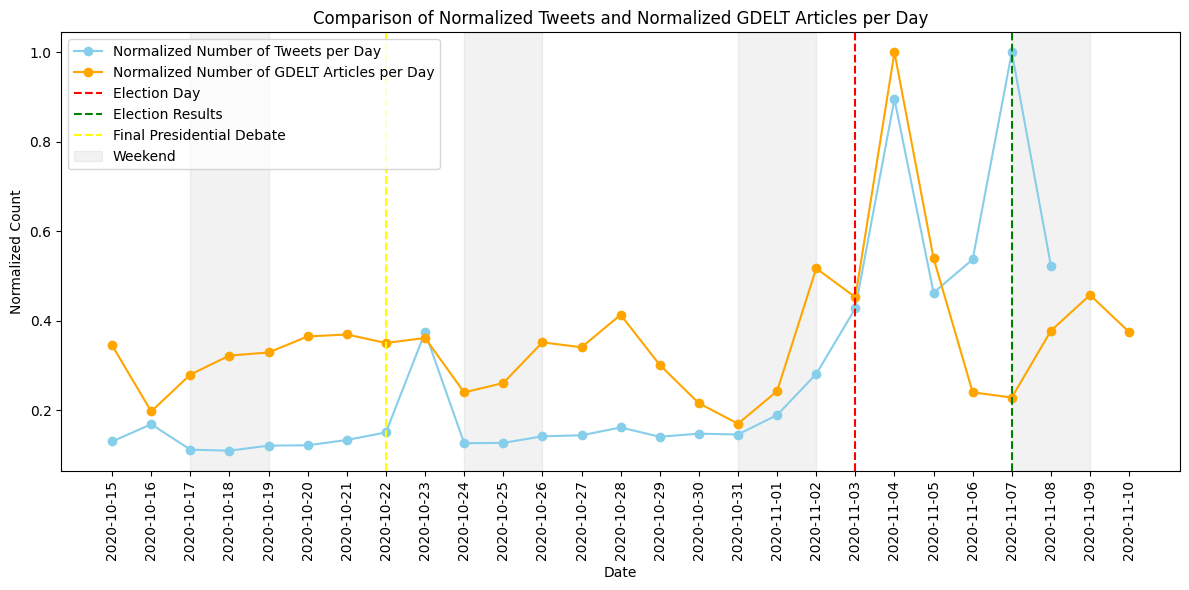

In [24]:
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.dates import DateFormatter

# Group the data by SQLDATE and count the number of data points for each date
date_counts = GDELT_data['SQLDATE'].value_counts().sort_index()

# Convert SQLDATE to the same datetime format as in (1)
date_counts.index = pd.to_datetime(date_counts.index, format='%Y%m%d')

# Normalize the first dataset (from (1)) to the range [0, 1]
max_value_tweets = tweets_per_day.max()
normalized_tweets = tweets_per_day / max_value_tweets

# Normalize the second dataset (converted from SQLDATE) to the range [0, 1]
max_value_articles = date_counts.max()
normalized_date_counts = date_counts / max_value_articles

# Create a figure and axis
fig, ax = plt.subplots(figsize=(12, 6))

# Plot the first dataset (normalized from (1)) on the left y-axis
ax.plot(tweets_per_day.index, normalized_tweets.values, marker='o', label='Normalized Number of Tweets per Day', color='skyblue')

# Plot the second dataset (normalized) on the same y-axis
ax.plot(date_counts.index, normalized_date_counts.values, marker='o', label='Normalized Number of GDELT Articles per Day', color='orange')

# Add vertical lines for specific dates
dates_to_highlight = ["2020-11-03", "2020-11-07", "2020-10-22"]  # Add your desired dates here
title_of_dates = ["Election Day", "Election Results", "Final Presidential Debate"]
colors = ["red", "green", "yellow"]

for date_to_highlight, color, title in zip(dates_to_highlight, colors, title_of_dates):
    ax.axvline(pd.to_datetime(date_to_highlight), color=color, linestyle='--', label=title)
    



# Ensure that all dates are displayed on the x-axis
date_range = pd.date_range(start='2020-10-15', end='2020-11-10', freq='D')
ax.set_xticks(date_range)

# Initialize an empty list to store weekend dates
weekend_dates = []

# Iterate through all dates and check if they are weekends
for i in range(len(date_range)):
    date = date_range[i]
    if i == 0 and date.dayofweek == 6:
        weekend_dates.append([date,date + timedelta(days=1)])
    elif date.dayofweek == 5:
        weekend_dates.append([date,date + timedelta(days=1)])
    elif date.dayofweek == 6:
        weekend_dates[-1][1]= date + timedelta(days=1)
    

# Print the list of weekend dates
print("Weekend Days:")
print(weekend_dates)

i = 0

for weekend in weekend_dates:
    # Add shaded region for the period between '2020-11-03' and '2020-11-07'
#     ax.axvspan(weekend[0], weekend[1], color='gray', alpha=0.1, label='Weekend')
    if i==0:
        ax.axvspan(weekend[0], weekend[1], color='gray', alpha=0.1, label='Weekend')
    else:
        ax.axvspan(weekend[0], weekend[1], color='gray', alpha=0.1)
    i+=1

# Rotate the x-axis labels for better visibility
ax.tick_params(axis='x', rotation=90)

# Set labels and title
ax.set_xlabel('Date')
ax.set_ylabel('Normalized Count')
ax.set_title('Comparison of Normalized Tweets and Normalized GDELT Articles per Day')

# Merge both legends into a single legend
legend = ax.legend(loc='upper left')

plt.tight_layout()
plt.show()


<a id="section-four-b"></a>
## **Comparison of Normalized Tweets and Normalized Google Trends Web Search Data**

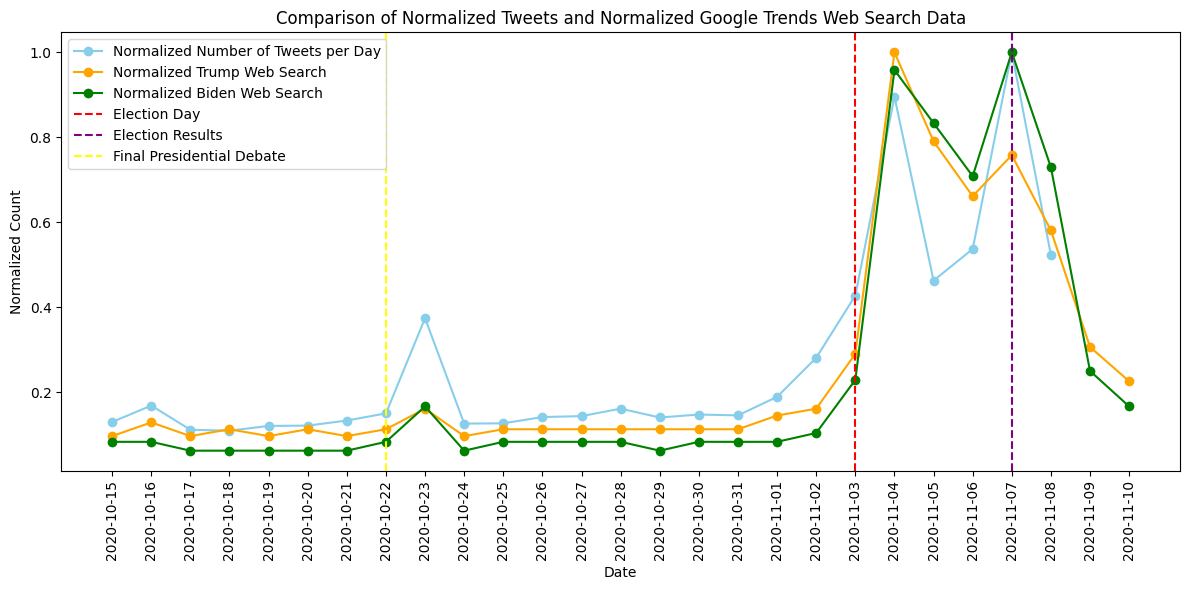

In [25]:
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.dates import DateFormatter

# # Assuming us_election_data is your DataFrame with the 'created_at' column
# donald_trump = pd.read_csv('/kaggle/input/us-election-2020-tweets/hashtag_donaldtrump.csv', lineterminator='\n')
# donald_trump.loc[:,'Candidate'] = 'Donald Trump'
# joe_biden = pd.read_csv('/kaggle/input/us-election-2020-tweets/hashtag_joebiden.csv', lineterminator='\n')
# joe_biden.loc[:,'Candidate'] = 'Joe Biden'
# us_election_data = pd.concat([joe_biden,donald_trump])
# us_election_data['created_at'] = pd.to_datetime(us_election_data['created_at'])  # Convert the 'created_at' column to datetime

# Resample the data by day and count the number of records (tweets)
tweets_per_day = us_election_data.resample('D', on='created_at').size()

# Normalize the first dataset (from (1)) to the range [0, 1]
max_value_tweets = tweets_per_day.max()
normalized_tweets = tweets_per_day / max_value_tweets

# Normalize the Trump web search data onto itself (range [0, 1])
max_value_trump_web = trump_web_df['Trump'].max()
normalized_trump_web = trump_web_df['Trump'] / max_value_trump_web

# Normalize the Biden web search data onto itself (range [0, 1])
max_value_biden_web = biden_web_df['Biden'].max()
normalized_biden_web = biden_web_df['Biden'] / max_value_biden_web

# Create a figure and axis
fig, ax = plt.subplots(figsize=(12, 6))

# Plot the first dataset (normalized from (1)) on the left y-axis
ax.plot(tweets_per_day.index, normalized_tweets.values, marker='o', label='Normalized Number of Tweets per Day', color='skyblue')

# Plot the second dataset (normalized Trump web search) on the same y-axis
ax.plot(trump_web_df['Day'], normalized_trump_web.values, marker='o', label='Normalized Trump Web Search', color='orange')

# Plot the third dataset (normalized Biden web search) on the same y-axis
ax.plot(biden_web_df['Day'], normalized_biden_web.values, marker='o', label='Normalized Biden Web Search', color='green')

# Add vertical lines for specific dates
dates_to_highlight = ["2020-11-03", "2020-11-07", "2020-10-22"]  # Add your desired dates here
title_of_dates = ["Election Day", "Election Results", "Final Presidential Debate"]
colors = ["red", "purple", "yellow"]

for date_to_highlight, color, title in zip(dates_to_highlight, colors, title_of_dates):
    ax.axvline(pd.to_datetime(date_to_highlight), color=color, linestyle='--', label=title)

# Merge both legends into a single legend
legend = ax.legend(loc='upper left')

# Ensure that all dates are displayed on the x-axis
date_range = pd.date_range(start='2020-10-15', end='2020-11-10', freq='D')
ax.set_xticks(date_range)

# Rotate the x-axis labels for better visibility
ax.tick_params(axis='x', rotation=90)

# Set labels and title
ax.set_xlabel('Date')
ax.set_ylabel('Normalized Count')
ax.set_title('Comparison of Normalized Tweets and Normalized Google Trends Web Search Data')

plt.tight_layout()

plt.savefig("US2020NormalisedTweetsVsGoogleTrends.")
plt.show()


In [26]:
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.dates import DateFormatter
import ipywidgets as widgets
from ipywidgets import interact

# ... (Previous code to load and preprocess data)
# Normalize the first dataset (from (1)) to the range [0, 1]
max_value_tweets = tweets_per_day.max()
normalized_tweets = tweets_per_day / max_value_tweets

# Normalize the Trump web search data onto itself (range [0, 1])
max_value_trump_web = trump_web_df['Trump'].max()
normalized_trump_web = trump_web_df['Trump'] / max_value_trump_web

# Normalize the Biden web search data onto itself (range [0, 1])
max_value_biden_web = biden_web_df['Biden'].max()
normalized_biden_web = biden_web_df['Biden'] / max_value_biden_web

# Create a function to update the plot based on the selected datasets
def update_plot(show_tweets, show_trump, show_biden):
    fig, ax = plt.subplots(figsize=(12, 6))

    if show_tweets:
        ax.plot(tweets_per_day.index, normalized_tweets.values, marker='o', label='Normalized Number of Tweets per Day', color='skyblue')
    if show_trump:
        ax.plot(trump_web_df['Day'], normalized_trump_web.values, marker='o', label='Normalized Trump Web Search', color='orange')
    if show_biden:
        ax.plot(biden_web_df['Day'], normalized_biden_web.values, marker='o', label='Normalized Biden Web Search', color='green')

    # Add vertical lines for specific dates
    dates_to_highlight = ["2020-11-03", "2020-11-07", "2020-10-22"]  # Add your desired dates here
    title_of_dates = ["Election Day", "Election Results", "Final Presidential Debate"]
    colors = ["red", "purple", "yellow"]

    for date_to_highlight, color, title in zip(dates_to_highlight, colors, title_of_dates):
        ax.axvline(pd.to_datetime(date_to_highlight), color=color, linestyle='--', label=title)

    # Merge both legends into a single legend
    legend = ax.legend(loc='upper left')

    # Ensure that all dates are displayed on the x-axis
    date_range = pd.date_range(start='2020-10-15', end='2020-11-10', freq='D')
    ax.set_xticks(date_range)

    # Rotate the x-axis labels for better visibility
    ax.tick_params(axis='x', rotation=90)

    # Set labels and title
    ax.set_xlabel('Date')
    ax.set_ylabel('Normalized Count')
    ax.set_title(f'Comparison of Normalized Datasets and Normalized Web Search Data')

    plt.tight_layout()
    plt.show()

# Create checkboxes to select the datasets
show_tweets_checkbox = widgets.Checkbox(
    value=False,
    description='Show Tweets',
    disabled=False
)

show_trump_checkbox = widgets.Checkbox(
    value=False,
    description='Show Trump Web Search',
    disabled=False
)

show_biden_checkbox = widgets.Checkbox(
    value=False,
    description='Show Biden Web Search',
    disabled=False
)

# Create an interactive plot
interact(update_plot, show_tweets=show_tweets_checkbox, show_trump=show_trump_checkbox, show_biden=show_biden_checkbox)


interactive(children=(Checkbox(value=False, description='Show Tweets'), Checkbox(value=False, description='Sho…

<function __main__.update_plot(show_tweets, show_trump, show_biden)>

<a id="section-four-c"></a>
## Comparison of Normalized GDELT Articles and Normalized Google Trends News Search Data

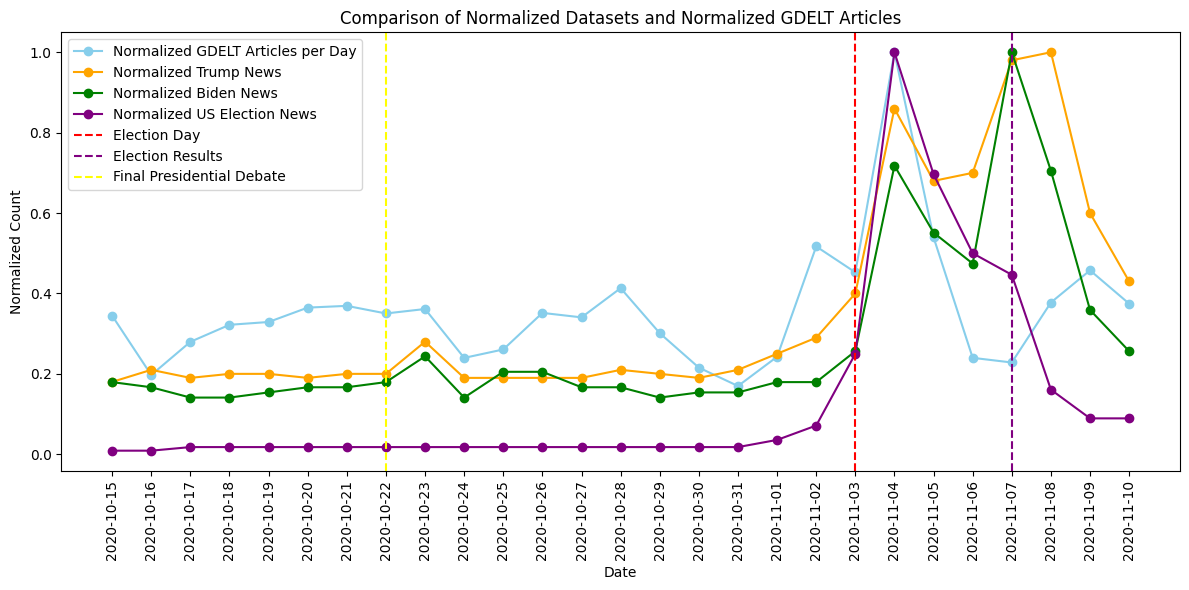

In [27]:
import pandas as pd
import matplotlib.pyplot as plt

# Assuming you have already loaded and prepared the data
# Normalize the GDELT data
max_value_articles = date_counts.max()
normalized_date_counts = date_counts / max_value_articles

# Create a figure and axis
fig, ax = plt.subplots(figsize=(12, 6))

# Plot the GDELT data
ax.plot(normalized_date_counts.index, normalized_date_counts.values, marker='o', label='Normalized GDELT Articles per Day', color='skyblue')

# Plot the second dataset (normalized Trump news) on the same y-axis
max_value_trump_news = trump_news_df['Trump'].astype(float).max()  # Convert to float and then find max
normalized_trump_news = trump_news_df['Trump'].astype(float) / max_value_trump_news
ax.plot(trump_news_df['Day'], normalized_trump_news.values, marker='o', label='Normalized Trump News', color='orange')

# Plot the third dataset (normalized Biden news) on the same y-axis
max_value_biden_news = biden_news_df['Biden'].astype(float).max()  # Convert to float and then find max
normalized_biden_news = biden_news_df['Biden'].astype(float) / max_value_biden_news
ax.plot(biden_news_df['Day'], normalized_biden_news.values, marker='o', label='Normalized Biden News', color='green')

# Plot the fourth dataset (normalized US Election news) on the same y-axis
max_value_us_election_news = us_election_news_df['US Election'].astype(float).max()  # Convert to float and then find max
normalized_us_election_news = us_election_news_df['US Election'].astype(float) / max_value_us_election_news
ax.plot(us_election_news_df['Day'], normalized_us_election_news.values, marker='o', label='Normalized US Election News', color='purple')

# Add vertical lines for specific dates
dates_to_highlight = ["2020-11-03", "2020-11-07", "2020-10-22"]  # Add your desired dates here
title_of_dates = ["Election Day", "Election Results", "Final Presidential Debate"]
colors = ["red", "purple", "yellow"]

for date_to_highlight, color, title in zip(dates_to_highlight, colors, title_of_dates):
    ax.axvline(pd.to_datetime(date_to_highlight), color=color, linestyle='--', label=title)

# Merge both legends into a single legend
legend = ax.legend(loc='upper left')

# Ensure that all dates are displayed on the x-axis
date_range = pd.date_range(start='2020-10-15', end='2020-11-10', freq='D')
ax.set_xticks(date_range)

# Rotate the x-axis labels for better visibility
ax.tick_params(axis='x', rotation=90)

# Set labels and title
ax.set_xlabel('Date')
ax.set_ylabel('Normalized Count')
ax.set_title('Comparison of Normalized Datasets and Normalized GDELT Articles')

plt.tight_layout()
plt.show()


In [28]:
import pandas as pd
import matplotlib.pyplot as plt
import ipywidgets as widgets
from ipywidgets import interact

# ... (Previous code to load and preprocess data)
# Normalize the GDELT Articles data
max_value_articles = date_counts.max()
normalized_date_counts = date_counts / max_value_articles

# Create a function to update the plot based on the selected datasets
def update_plot(show_gdelt, show_trump, show_biden, show_us_election):
    fig, ax = plt.subplots(figsize=(12, 6))

    if show_gdelt:
        ax.plot(normalized_date_counts.index, normalized_date_counts.values, marker='o', label='Normalized GDELT Articles per Day', color='skyblue')
    if show_trump:
        ax.plot(trump_news_df['Day'], normalized_trump_news.values, marker='o', label='Normalized Trump News', color='orange')
    if show_biden:
        ax.plot(biden_news_df['Day'], normalized_biden_news.values, marker='o', label='Normalized Biden News', color='green')
    if show_us_election:
        ax.plot(us_election_news_df['Day'], normalized_us_election_news.values, marker='o', label='Normalized US Election News', color='purple')

    # Add vertical lines for specific dates
    dates_to_highlight = ["2020-11-03", "2020-11-07", "2020-10-22"]  # Add your desired dates here
    title_of_dates = ["Election Day", "Election Results", "Final Presidential Debate"]
    colors = ["red", "purple", "yellow"]

    for date_to_highlight, color, title in zip(dates_to_highlight, colors, title_of_dates):
        ax.axvline(pd.to_datetime(date_to_highlight), color=color, linestyle='--', label=title)

    # Merge both legends into a single legend
    legend = ax.legend(loc='upper left')

    # Ensure that all dates are displayed on the x-axis
    date_range = pd.date_range(start='2020-10-15', end='2020-11-10', freq='D')
    ax.set_xticks(date_range)

    # Rotate the x-axis labels for better visibility
    ax.tick_params(axis='x', rotation=90)

    # Set labels and title
    ax.set_xlabel('Date')
    ax.set_ylabel('Normalized Count')
    ax.set_title(f'Comparison of Normalized Datasets and Normalized GDELT Articles')

    plt.tight_layout()
    plt.show()

# Create checkboxes to show/hide specific news data
show_gdelt_checkbox = widgets.Checkbox(
    value=True,
    description='Show GDELT Articles',
    disabled=False
)

show_trump_checkbox = widgets.Checkbox(
    value=False,
    description='Show Trump News',
    disabled=False
)

show_biden_checkbox = widgets.Checkbox(
    value=False,
    description='Show Biden News',
    disabled=False
)

show_us_election_checkbox = widgets.Checkbox(
    value=False,
    description='Show US Election News',
    disabled=False
)

# Create an interactive plot
interact(update_plot, show_gdelt=show_gdelt_checkbox, show_trump=show_trump_checkbox, show_biden=show_biden_checkbox, show_us_election=show_us_election_checkbox)


interactive(children=(Checkbox(value=True, description='Show GDELT Articles'), Checkbox(value=False, descripti…

<function __main__.update_plot(show_gdelt, show_trump, show_biden, show_us_election)>

<a id="section-five"></a>
# **5. Mastodon API Analysis:**

Mastodon is an open-source, decentralized social media platform designed to provide an alternative to centralized social media networks like Twitter and Facebook. Users on Mastodon can create accounts on independently operated instances, also known as servers or nodes, and these instances can communicate with each other. Mastodon allows users to post and share text-based messages, images, and other media, as well as interact with others through features like following, liking (favoriting), and reblogging (boosting).

It has an open API which allows for easy access to the data.

It is important to note that all the data was gather using Hashtags relevant to the election.

In [29]:
import pandas as pd

# Load the CSV file into a DataFrame
file_path = "/kaggle/input/mastodon-us-elections-1/US-election-mastodon6.csv"
mastodon_df = pd.read_csv(file_path)

# Convert 'created_at' column to datetime
mastodon_df['created_at'] = pd.to_datetime(mastodon_df['created_at'])

# Sort the DataFrame by 'created_at' column
mastodon_df.sort_values(by='created_at', inplace=True)

# Display DataFrame info
mastodon_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 5704 entries, 859 to 4989
Data columns (total 14 columns):
 #   Column                   Non-Null Count  Dtype              
---  ------                   --------------  -----              
 0   created_at               5704 non-null   datetime64[ns, UTC]
 1   tweet_id                 5704 non-null   int64              
 2   tweet                    5704 non-null   object             
 3   Tweet Reply Count        5704 non-null   int64              
 4   retweet_count            5704 non-null   int64              
 5   Tweet Favorite Count     5704 non-null   int64              
 6   Tweet Language           5673 non-null   object             
 7   User ID                  5704 non-null   int64              
 8   User Name                5704 non-null   object             
 9   User Screen Name         5564 non-null   object             
 10  User Description         5338 non-null   object             
 11  User Followers Count     5704 non

In [30]:
mastodon_df.head(10).tail(6)

,created_at,tweet_id,tweet,Tweet Reply Count,retweet_count,Tweet Favorite Count,Tweet Language,User ID,User Name,User Screen Name,User Description,User Followers Count,User Statuses Count,User Account Created At
3867,2020-10-15 02:03:26+00:00,105036346878022186,<p>Élections présidentielles américaines : int...,0,0,0,fr,49226,SOSOrdinet,🖱🛠👉👕👈 SOSOrdinet 🎣🖥️🐛 🗞️,"<p><span class=""h-card""><a href=""https://socia...",18,918,2017-04-04T00:00:00.000Z
5703,2020-10-15 02:05:00+00:00,105035526982251080,Reisewarnungen verwandeln die Welt in einen ge...,0,0,0,de,698355,spon,SPIEGEL Online (inoffiziell),Inoffizieller Dump des SPIEGEL-online RSS-Feeds.,13166,60470,2019-01-26T00:00:00.000Z
3623,2020-10-15 02:12:26+00:00,105035529189141191,Die First Lady der USA hat ihre Corona-Infekti...,0,0,0,de,698355,spon,SPIEGEL Online (inoffiziell),Inoffizieller Dump des SPIEGEL-online RSS-Feeds.,13166,60470,2019-01-26T00:00:00.000Z
5702,2020-10-15 04:41:00+00:00,105036239101641323,"""So schrecklich"": Mit deutlichen Worten hat Do...",0,0,0,de,698355,spon,SPIEGEL Online (inoffiziell),Inoffizieller Dump des SPIEGEL-online RSS-Feeds.,13166,60470,2019-01-26T00:00:00.000Z
1749,2020-10-15 04:41:00+00:00,105036239101641323,"""So schrecklich"": Mit deutlichen Worten hat Do...",0,0,0,de,698355,spon,SPIEGEL Online (inoffiziell),Inoffizieller Dump des SPIEGEL-online RSS-Feeds.,13166,60470,2019-01-26T00:00:00.000Z
3622,2020-10-15 04:41:00+00:00,105036239101641323,"""So schrecklich"": Mit deutlichen Worten hat Do...",0,0,0,de,698355,spon,SPIEGEL Online (inoffiziell),Inoffizieller Dump des SPIEGEL-online RSS-Feeds.,13166,60470,2019-01-26T00:00:00.000Z


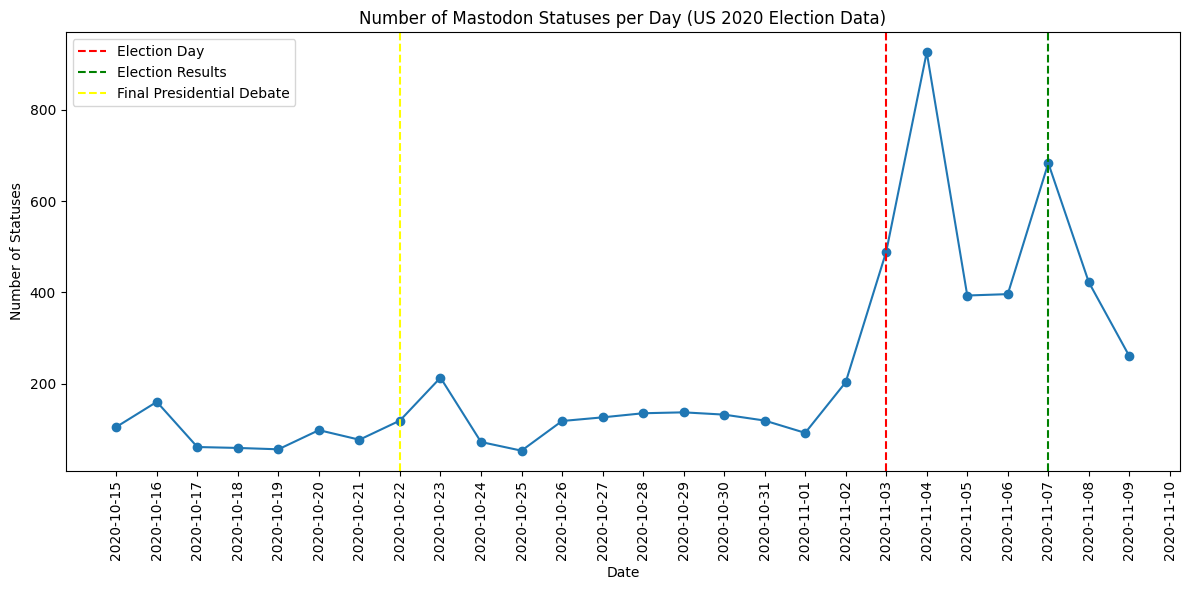

In [31]:
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.dates import DateFormatter


# Resample the data by day and count the number of records (tweets)
statuses_per_day = mastodon_df.resample('D', on='created_at').size()

# Find the date with the highest number of tweets
date_with_highest_statuses = statuses_per_day.idxmax()

# Create a figure and axis
fig, ax = plt.subplots(figsize=(12, 6))

# Plot the data
ax.plot(statuses_per_day.index, statuses_per_day.values, marker='o')

# Set the x-axis format to display only the date
date_formatter = DateFormatter('%Y-%m-%d')
ax.xaxis.set_major_formatter(date_formatter)

# Set the date range from '2020-10-15' to '2020-11-08'
date_range = pd.date_range(start='2020-10-15', end='2020-11-10', freq='D')
all_dates = date_range.tolist()

ax.set_xticks(all_dates)

# Add markers for the 3rd of November and the day with the highest tweets
ax.axvline(pd.Timestamp('2020-11-03'), color='red', linestyle='--', label='Election Day')
ax.axvline(pd.Timestamp('2020-11-07'), color='green', linestyle='--', label='Election Results', linewidth=1.5)
ax.axvline(pd.Timestamp('2020-10-22'), color='yellow', linestyle='--', label='Final Presidential Debate')


ax.legend()

# Rotate the x-axis labels for better visibility
plt.xticks(rotation=90)

# Set labels and title
ax.set_xlabel('Date')
ax.set_ylabel('Number of Statuses')
ax.set_title('Number of Mastodon Statuses per Day (US 2020 Election Data)')

plt.savefig("US2020MastodonAPI.png")
plt.tight_layout()
plt.show()

<a id="section-five-a"></a>
## **Comparison of Number of Tweets and Mastodon Statuses per Day**

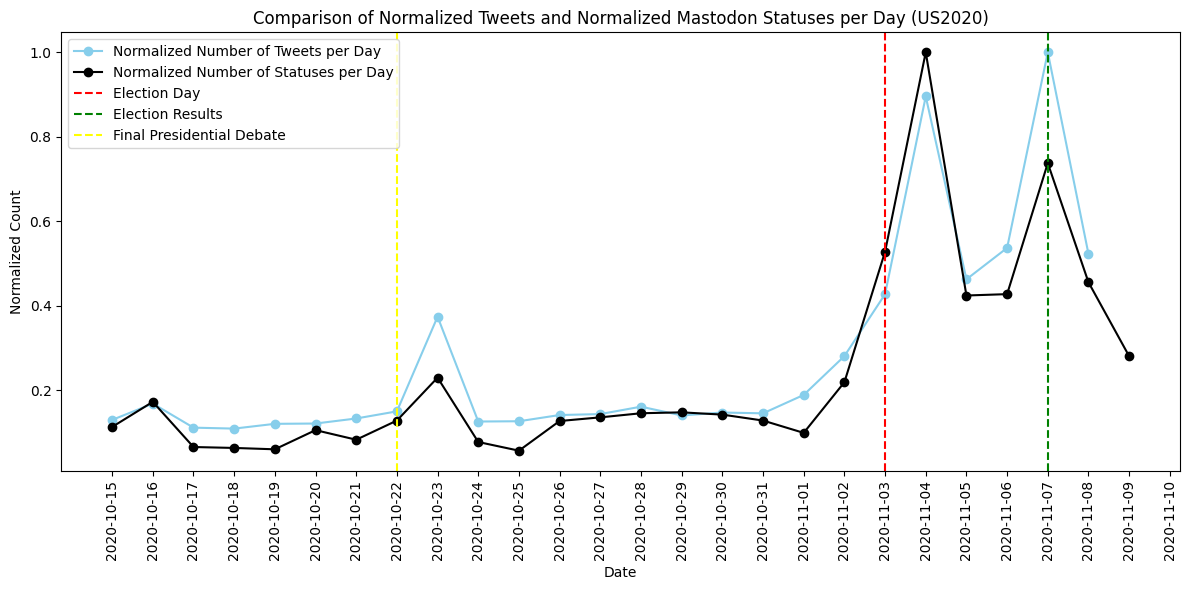

In [32]:
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.dates import DateFormatter


# Normalize the first dataset (from (1)) to the range [0, 1]
max_value_tweets = tweets_per_day.max()
normalized_tweets = tweets_per_day / max_value_tweets

# Normalize the second dataset (converted from SQLDATE) to the range [0, 1]
max_value_statuses = statuses_per_day.max()
normalized_statuses = statuses_per_day / max_value_statuses

# Create a figure and axis
fig, ax = plt.subplots(figsize=(12, 6))

# Plot the first dataset (normalized from (1)) on the left y-axis
ax.plot(tweets_per_day.index, normalized_tweets.values, marker='o', label='Normalized Number of Tweets per Day', color='skyblue')

# Plot the second dataset (normalized) on the same y-axis
ax.plot(statuses_per_day.index, normalized_statuses.values, marker='o', label='Normalized Number of Statuses per Day', color='black')

# Add vertical lines for specific dates
dates_to_highlight = ["2020-11-03", "2020-11-07", "2020-10-22"]  # Add your desired dates here
title_of_dates = ["Election Day", "Election Results", "Final Presidential Debate"]
colors = ["red", "green", "yellow"]

for date_to_highlight, color, title in zip(dates_to_highlight, colors, title_of_dates):
    ax.axvline(pd.to_datetime(date_to_highlight), color=color, linestyle='--', label=title)
    

# Merge both legends into a single legend
legend = ax.legend(loc='upper left')

# Ensure that all dates are displayed on the x-axis
date_range = pd.date_range(start='2020-10-15', end='2020-11-10', freq='D')
ax.set_xticks(date_range)

# Rotate the x-axis labels for better visibility
ax.tick_params(axis='x', rotation=90)

# Set labels and title
ax.set_xlabel('Date')
ax.set_ylabel('Normalized Count')
ax.set_title('Comparison of Normalized Tweets and Normalized Mastodon Statuses per Day (US2020)')


plt.tight_layout()
plt.savefig("US2020MastodonVsTwitter.png")
plt.show()

<a id="section-six"></a>
# **6. Mathematical Framework**

<a id="section-six-a"></a>
## **Seasonal Decomposition**

## Components of decompsition:

**1. Trend Component:**

The trend component represents the underlying **long-term behavior** or trend in the data. In this context, it represents whether data is showing an general trend of increasing, decreasing, or remaining relatively stable over time.
By examining the trend component, you can identify significant shifts or changes in the overall trend, such as periods of rapid growth or decline.

**2. Seasonal Component:**

The seasonal component captures **repeating patterns** or seasonality in the data. Seasonality refers to regular fluctuations in the data that occur at fixed intervals, such as daily, weekly, monthly, or yearly patterns.
By analyzing the seasonal component, you can identify and understand the seasonal patterns in the number of GDELT articles. For example, you can determine if there are specific times of the year or week when article counts tend to be higher or lower.

**3. Residual Component:**

The residual component represents the **unexplained or random variation in the data** that remains after removing the trend and seasonal components. It includes noise and irregular fluctuations.
Examining the residual component can help you identify unusual or unexpected events that are not explained by the trend or seasonality. Large residual values may indicate outliers or anomalies in the data.

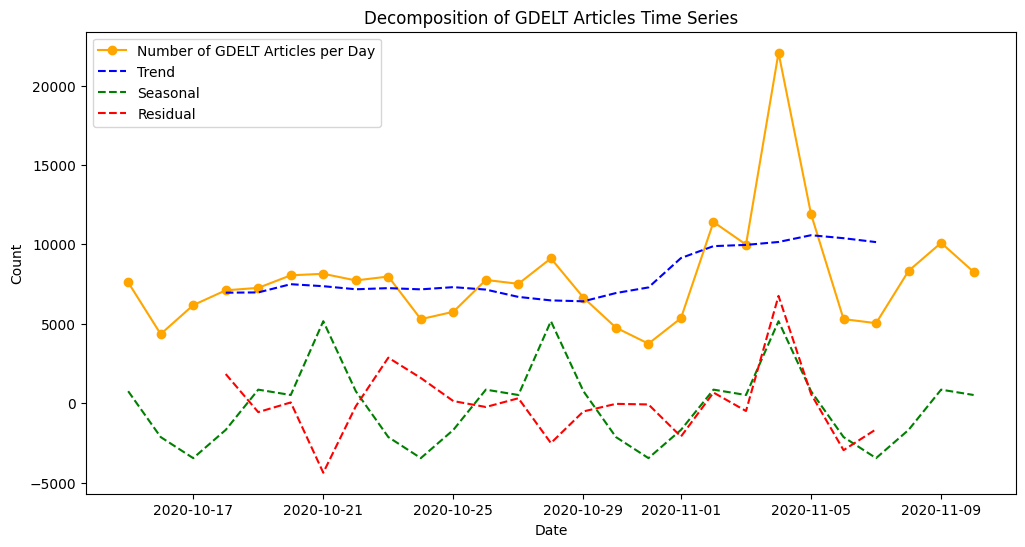

In [33]:
from statsmodels.tsa.seasonal import seasonal_decompose

# Group the data by SQLDATE and count the number of data points for each date
date_counts = GDELT_data['SQLDATE'].value_counts().sort_index()

# Convert SQLDATE to the same datetime format as in (1)
date_counts.index = pd.to_datetime(date_counts.index, format='%Y%m%d')

# Decompose the time series
decomposition = seasonal_decompose(date_counts, model='additive')  # Assuming annual seasonality (365 days)

# Plot the original data
plt.figure(figsize=(12, 6))
plt.plot(date_counts.index, date_counts.values, marker='o', label='Number of GDELT Articles per Day', color='orange')

# Plot the trend component
plt.plot(decomposition.trend.index, decomposition.trend.values, label='Trend', linestyle='--', color='blue')

# Plot the seasonal component
plt.plot(decomposition.seasonal.index, decomposition.seasonal.values, label='Seasonal', linestyle='--', color='green')

# Plot the residual component
plt.plot(decomposition.resid.index, decomposition.resid.values, label='Residual', linestyle='--', color='red')


plt.xlabel('Date')
plt.ylabel('Count')
plt.title('Decomposition of GDELT Articles Time Series')
plt.legend()
plt.show()


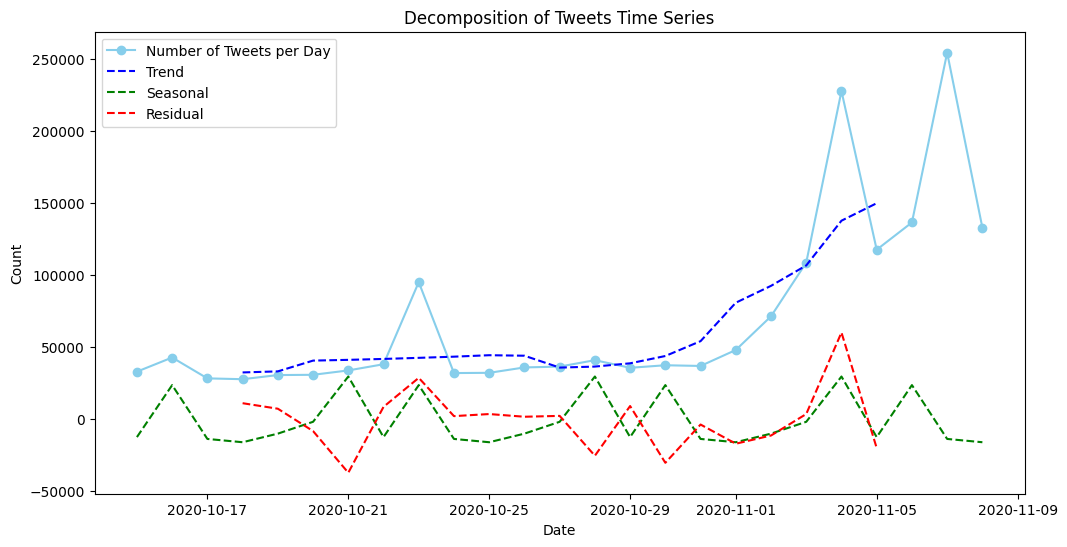

In [34]:
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.seasonal import seasonal_decompose

# Assuming you have already resampled 'us_election_data' to get 'tweets_per_day'
# Ensure 'tweets_per_day' is a Pandas Series with a datetime index

# Decompose the time series
decomposition = seasonal_decompose(tweets_per_day, model='additive', period=7)  # Assuming annual seasonality (365 days)

# Create a figure
plt.figure(figsize=(12, 6))

# Plot the original data
plt.plot(tweets_per_day.index, tweets_per_day.values, marker='o', label='Number of Tweets per Day', color='skyblue')

# Plot the trend component
plt.plot(decomposition.trend.index, decomposition.trend.values, label='Trend', linestyle='--', color='blue')

# Plot the seasonal component
plt.plot(decomposition.seasonal.index, decomposition.seasonal.values, label='Seasonal', linestyle='--', color='green')

# Plot the residual component
plt.plot(decomposition.resid.index, decomposition.resid.values, label='Residual', linestyle='--', color='red')

plt.xlabel('Date')
plt.ylabel('Count')
plt.title('Decomposition of Tweets Time Series')
plt.legend()
plt.savefig("US2020SeasonalDecomp.png")
plt.show()


<a id="section-six-b"></a>
## **LOESS Regression:**

####  LOESS — locally estimated scatterplot smoothing

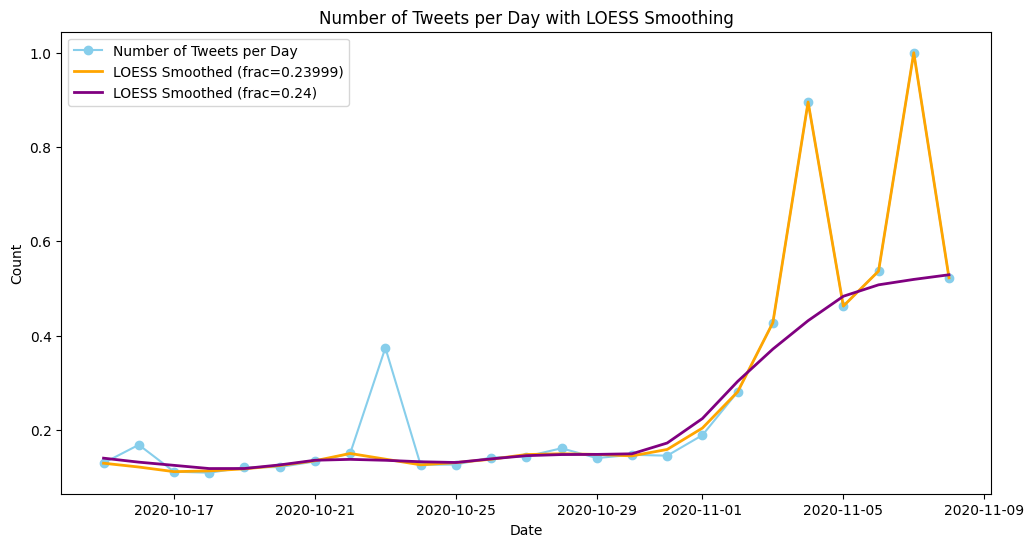

In [35]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import statsmodels.api as sm

# Resample the data by day and count the number of records (tweets)
tweets_per_day = us_election_data.resample('D', on='created_at').size()

# Normalize the first dataset (from (1)) to the range [0, 1]
max_value_tweets = tweets_per_day.max()
normalized_tweets = tweets_per_day / max_value_tweets

# Create a figure and axis
fig, ax = plt.subplots(figsize=(12, 6))

# Plot the first dataset (Number of Tweets per Day)
ax.plot(tweets_per_day.index, normalized_tweets.values, marker='o', label='Number of Tweets per Day', color='skyblue')

# Apply LOESS smoothing
lowess_0_23999 = sm.nonparametric.lowess(normalized_tweets.values, tweets_per_day.index, frac=0.23999)  # You can adjust the 'frac' parameter to control the smoothing
lowess_0_24 = sm.nonparametric.lowess(normalized_tweets.values, tweets_per_day.index, frac=0.24)  # You can adjust the 'frac' parameter to control the smoothing

# Extract smoothed values
smoothed_values_0_23999 = lowess_0_23999[:, 1]
smoothed_values_0_24 = lowess_0_24[:, 1]

# Plot the smoothed curve
ax.plot(tweets_per_day.index, smoothed_values_0_23999, label='LOESS Smoothed (frac=0.23999)', color='orange', linewidth=2)
ax.plot(tweets_per_day.index, smoothed_values_0_24, label='LOESS Smoothed (frac=0.24)', color='purple', linewidth=2)

# Add labels and legend
ax.set_xlabel('Date')
ax.set_ylabel('Count')
ax.set_title('Number of Tweets per Day with LOESS Smoothing')
ax.legend()

plt.savefig("US2020LOESSReg.png")

# Show the plot
plt.show()


<a id="section-seven"></a>
# **7. Twitter 2016 US Election:**

Tweets scraped by Chris Albon on the day of the 2016 United States elections.

Chris Albon's site only posted tweet IDs, rather than full tweets. We're in the process of scraping the full information, but due to API limiting this is taking a very long time. Version 1 of this dataset contains just under 400k tweets, about 6% of the 6.5 million originally posted.

[This dataset](https://www.kaggle.com/datasets/kinguistics/election-day-tweets#election_day_tweets.csv) will be updated as more tweets become available.

The Data
Since I (Ed King) used my own Twitter API key to scrape these tweets, this dataset contains a couple of fields with information on whether I have personally interacted with particular users or tweets. Since Kaggle encouraged me to not remove any data from a dataset, I'm leaving it in; feel free to build a classifier of the types of users I follow.

The dataset consists of the following fields:

text: text of the tweet
created_at: date and time of the tweet
geo: a JSON object containing coordinates [latitude, longitude] and a "type"
lang: Twitter's guess as to the language of the tweet
place: a Place object from the Twitter API
coordinates: a JSON object containing coordinates [longitude, latitude] and a "type"; note that coordinates are reversed from the geo field
* **user.favourites_count:** number of tweets the user has favorited
* **user.statuses_count:** number of statuses the user has posted
* **user.description:** the text of the user's profile description
* **user.location:** text of the user's profile location
* **user.id:** unique id for the user
* **user.created_at:** when the user created their account
* **user.verified:** bool; is user verified?
* **user.following:** bool; am I (Ed King) following this user?
* **user.url:** the URL that the user listed in their profile (not necessarily a link to their Twitter profile)
* **user.listed_count:** number of lists this user is on (?)
* **user.followers_count:** number of accounts that follow this user
* **user.default_profile_image:** bool; does the user use the default profile pic?
* **user.utc_offset:** positive or negative distance from UTC, in seconds
* **user.friends_count:** number of accounts this user follows
* **user.default_profile:** bool; does the user use the default profile?
* **user.name:** user's profile name
* **user.lang:** user's default language
* **user.screen_name:** user's account name
* **user.geo_enabled:** bool; does user have geo enabled?
* **user.profile_background_color:** user's profile background color, as hex in format "RRGGBB" (no '#')
* **user.profile_image_url:** a link to the user's profile pic
* **user.time_zone:** full name of the user's time zone
* **id:** unique tweet ID
* **favorite_count:** number of times the tweet has been favorited
* **retweeted:** is this a retweet?
* **source:** if a link, where is it from (e.g., "Instagram")
* **favorited:** have I (Ed King) favorited this tweet?
* **retweet_count:** number of times this tweet has been retweeted

In [36]:
elections_2016 = pd.read_csv('/kaggle/input/election-day-tweets/election_day_tweets.csv')

In [37]:
elections_2016.sort_values(by='created_at').info()

<class 'pandas.core.frame.DataFrame'>
Index: 397629 entries, 162840 to 92778
Data columns (total 34 columns):
 #   Column                         Non-Null Count   Dtype  
---  ------                         --------------   -----  
 0   text                           397629 non-null  object 
 1   created_at                     397629 non-null  object 
 2   geo                            2564 non-null    object 
 3   lang                           397629 non-null  object 
 4   place                          30832 non-null   object 
 5   coordinates                    2564 non-null    object 
 6   user.favourites_count          397629 non-null  int64  
 7   user.statuses_count            397629 non-null  int64  
 8   user.description               353403 non-null  object 
 9   user.location                  302677 non-null  object 
 10  user.id                        397629 non-null  int64  
 11  user.created_at                397629 non-null  object 
 12  user.verified                  

In [38]:
elections_2016.head()

,text,created_at,geo,lang,place,coordinates,user.favourites_count,user.statuses_count,user.description,user.location,...,user.geo_enabled,user.profile_background_color,user.profile_image_url,user.time_zone,id,favorite_count,retweeted,source,favorited,retweet_count
0,.@Lawrence @HillaryClinton Two first @SenSchu...,2016-11-08 04:04:37,NaN,en,NaN,NaN,18882,26939,"The Specialist, Copyrighted TX0008044160 #Surv...",WorldWide 80Million StealthRUs,...,True,131516,http://pbs.twimg.com/profile_images/7878871945...,America/Los_Angeles,795839414735732737,11,False,Twitter for Android,False,8
1,My @latimesopinion op-ed on historic #Californ...,2016-11-08 04:08:10,NaN,en,NaN,NaN,8,4841,Hoover Institution research fellow; https://t....,"Palo Alto, California",...,True,C0DEED,http://pbs.twimg.com/profile_images/6514470051...,Pacific Time (US & Canada),795840310597193728,3,False,Twitter Web Client,False,4
2,#Senate Wisconsin Senate Preview: Johnson vs. ...,2016-11-08 04:11:35,NaN,en,NaN,NaN,728,160390,US SENATE NEWS FEED. The U.S. Senate is the w...,USA,...,False,473969,http://pbs.twimg.com/profile_images/6155877017...,Alaska,795841168621719552,0,False,dlvr.it,False,0
3,If Rubio Wins and #Trump Loses in #Florida... ...,2016-11-08 04:12:16,NaN,en,NaN,NaN,0,18105,The most trending Marco Rubio news as collecte...,Washington DC,...,False,C0DEED,http://pbs.twimg.com/profile_images/5890065307...,NaN,795841341146234880,0,False,Lead Stories Feed Publisher,False,0
4,#Senate Wisconsin Senate Preview: Johnson vs. ...,2016-11-08 04:16:20,NaN,en,NaN,NaN,4722,247322,News & #ALERTS. We are a large group of proud ...,24hr Live HD Stream Broadcast,...,False,1B95E0,http://pbs.twimg.com/profile_images/7971276617...,Eastern Time (US & Canada),795842365881782272,0,False,IFTTT,False,0


**Creating Signature from Dataset on Kaggle which invalid data**

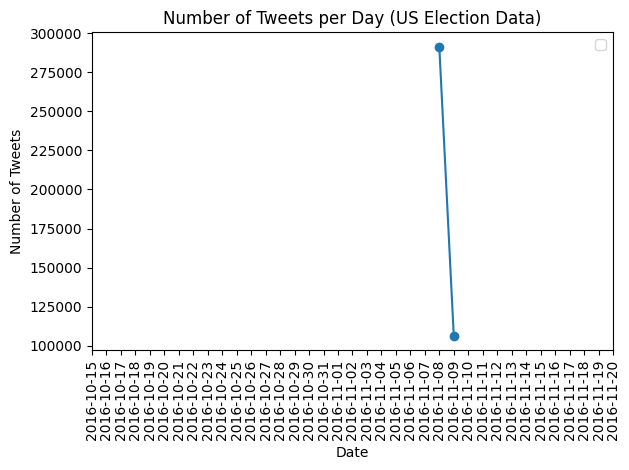

In [39]:
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.dates import DateFormatter

# Assuming us_election_data is your DataFrame with the 'created_at' column
elections_2016['created_at'] = pd.to_datetime(elections_2016['created_at'])  # Convert the 'created_at' column to datetime

# Resample the data by day and count the number of records (tweets)
tweets_per_day = elections_2016.resample('D', on='created_at').size()

# Find the date with the highest number of tweets
date_with_highest_tweets = tweets_per_day.idxmax()

# Create a figure and axis
fig, ax = plt.subplots()

# Plot the data
ax.plot(tweets_per_day.index, tweets_per_day.values, marker='o')

# Set the x-axis format to display only the date
date_formatter = DateFormatter('%Y-%m-%d')
ax.xaxis.set_major_formatter(date_formatter)

# Set the date range from '2020-10-15' to '2020-11-08'
date_range = pd.date_range(start='2016-10-15', end='2016-11-20', freq='D')
all_dates = date_range.tolist()

ax.set_xticks(all_dates)



ax.legend()

# Rotate the x-axis labels for better visibility
plt.xticks(rotation=90)

# Set labels and title
ax.set_xlabel('Date')
ax.set_ylabel('Number of Tweets')
ax.set_title('Number of Tweets per Day (US Election Data)')

plt.tight_layout()
plt.show()

## US Election 2016 Extracted twitter tweets

In [40]:
csv_file_path= '/kaggle/input/us-elections-2016-v2/Extracted_USElections_2016_2.csv'
US2016_tweets = pd.read_csv(csv_file_path, low_memory=False)

FileNotFoundError: [Errno 2] No such file or directory: '/kaggle/input/us-elections-2016-v2/Extracted_USElections_2016_2.csv'

In [ ]:
US2016_tweets.head()

In [ ]:
print('There are {} rows and {} columns in the twitter dataset'.format(US2016_tweets.shape[0],US2016_tweets.shape[1]))

In [ ]:
US2016_tweets.isna().sum()

<a id="section-seven-a"></a>
## **Number of Tweets per Day**

### Function to convert date format from tweets:

Example:
"Sun Sep 24 17:00:28 +0000 2017" to 2017-09-24

In [ ]:
def convert_dates(date_str):
    try:
        date_obj = datetime.strptime(date_str, "%a %b %d %H:%M:%S +0000 %Y")
        formatted_date = date_obj.strftime("%Y-%m-%d")
        return formatted_date
    except ValueError:
        print(date_str)
        return None

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.dates import DateFormatter

# Assuming earthquake_tweets is your DataFrame with the 'date' column
US2016_tweets['date'] = pd.to_datetime(US2016_tweets["Tweet Created At"].apply(convert_dates))  # Convert the 'date' column to datetime

# Resample the data by day and count the number of tweets
US2016_tweets_per_day = US2016_tweets.resample('D', on='date').size()

# print(US2016_tweets_per_day)

US2016_tweets_per_day_data = {"date": US2016_tweets_per_day.index,
                          "count": US2016_tweets_per_day.values}


# Create a DataFrame from the data
US2016_tweets_per_day_df = pd.DataFrame(US2016_tweets_per_day_data)


# Create a figure and axis
fig, ax = plt.subplots(figsize=(16, 8))

# Plot the data
ax.plot(US2016_tweets_per_day_data["date"][20:-1], US2016_tweets_per_day_data["count"][20:-1], marker='o')

# Set the x-axis format to display only the date
date_formatter = DateFormatter('%Y-%m-%d')
ax.xaxis.set_major_formatter(date_formatter)

# Set the dates starting from the beginning of the event:
specific_dates = [pd.Timestamp('2016-10-21')]  
date_range = pd.date_range(start='2016-10-21', end='2016-11-30', freq='D')
all_dates = specific_dates + date_range.tolist() 

ax.set_xticks(all_dates)

# Add markers for the 3rd of November and the day with the highest tweets
ax.axvline(pd.Timestamp('2016-11-08'), color='red', linestyle='--', label='Election Day')
ax.axvline(pd.Timestamp('2016-11-09'), color='green', linestyle='--', label='Election Results', linewidth=1.5)
# ax.axvline(pd.Timestamp('2020-10-22'), color='yellow', linestyle='--', label='Final Presidential Debate')

# Add a legend
ax.legend()

# Rotate the x-axis labels for better visibility
plt.xticks(rotation=90)

# Set labels and title
ax.set_xlabel('Date')
ax.set_ylabel('Number of Tweets')
ax.set_title('Number of Tweets per Day - US election 2016')


plt.tight_layout()
plt.show()

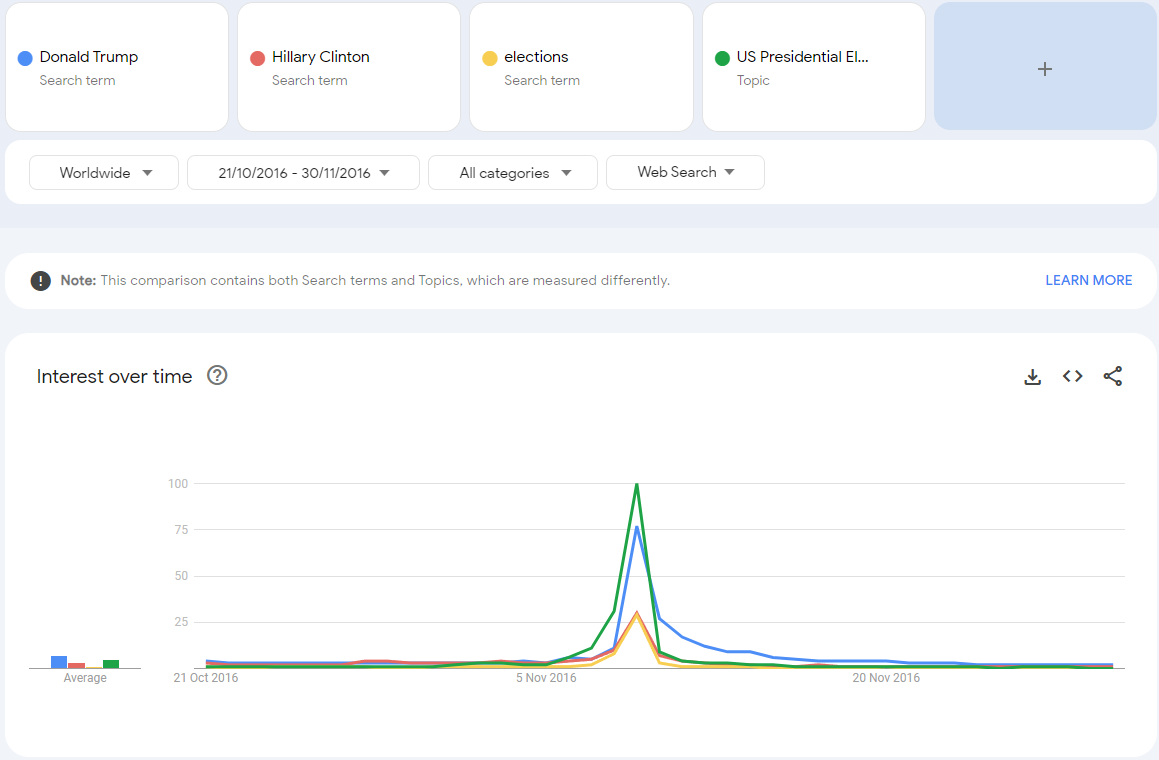

https://trends.google.com/trends/explore?date=2016-10-21%202016-11-30&q=Donald%20Trump,Hillary%20Clinton,elections,%2Fm%2F0ncc_0w&hl=en-GB

<a id="section-seven-b"></a>
## **Alignment of Signatures**

### Create function to find most correlated parts of both series

In [ ]:
import pandas as pd
import numpy as np
from scipy.signal import correlate

def find_best_matching_section(pattern_df_1, pattern_df_2):
    
    isdf_1biggerdf_2 = True
    
    if len(pattern_df_1) >= len(pattern_df_2):
        short_pattern_df = pd.DataFrame({'Value': pattern_df_2})
        long_pattern_df = pd.DataFrame({'Value': pattern_df_1})
        isdf_1biggerdf_2 = True
        
    else:
        short_pattern_df = pd.DataFrame({'Value': pattern_df_1})
        long_pattern_df = pd.DataFrame({'Value': pattern_df_2})
        isdf_1biggerdf_2 = False
        
    # Convert DataFrames to NumPy arrays
    short_pattern = short_pattern_df['Value'].to_numpy()
    long_pattern = long_pattern_df['Value'].to_numpy()

    # Initialize variables to store best correlation and its position
    best_correlation = -1  # Initialize with a low value
    best_position = None

    # Iterate through all possible alignments of the two patterns
    for position in range(len(long_pattern) - len(short_pattern) + 1):
        sub_long_pattern = long_pattern[position:position + len(short_pattern)]

        # Resize short_pattern to match the length of sub_long_pattern
        resized_short_pattern = short_pattern

        correlation = np.corrcoef(sub_long_pattern, resized_short_pattern)[0, 1]

        # Update the best correlation and its position if a better one is found
        if correlation > best_correlation:
            best_correlation = correlation
            best_position = position

    # Extract the best matching section from the longer pattern
    best_matching_section = long_pattern[best_position:best_position + len(short_pattern)]
    
    cut_long_pattern = best_matching_section
    

    # Return the best correlation and best matching section
    # Make sure the patterns are return in the original order they were inputted
    # if longer pattern in first input then longer pattern is in first output pattern
    
    if isdf_1biggerdf_2:
        return best_correlation, cut_long_pattern, short_pattern
    else: 
        return best_correlation, short_pattern, cut_long_pattern

In [ ]:
print(US2016_tweets_per_day_df)
# Assuming us_election_data is your DataFrame with the 'created_at' column
us_election_data['created_at'] = pd.to_datetime(us_election_data['created_at'])  # Convert the 'created_at' column to datetime

# Resample the data by day and count the number of records (tweets)
US2020_tweets_per_day = us_election_data.resample('D', on='created_at').size()

US2020_tweets_per_day_data = {"date": US2020_tweets_per_day.index,
                          "count": US2020_tweets_per_day.values}

# Create a DataFrame from the data
US2020_tweets_per_day_df = pd.DataFrame(US2020_tweets_per_day_data)

# Normalize the data
US2016_tweets_per_day_df['Normalized_Count'] = (US2016_tweets_per_day_df['count'] - US2016_tweets_per_day_df['count'].min()) / (US2016_tweets_per_day_df['count'].max() - US2016_tweets_per_day_df['count'].min())
US2020_tweets_per_day_df['Normalized_Count'] = (US2020_tweets_per_day_df['count'] - US2020_tweets_per_day_df['count'].min()) / (US2020_tweets_per_day_df['count'].max() - US2020_tweets_per_day_df['count'].min())

best_correlation, US2020_tweets_per_day_filtered, US2016_tweets_per_day_filtered = find_best_matching_section(US2020_tweets_per_day_df["Normalized_Count"], US2016_tweets_per_day_df["Normalized_Count"])

US2020_tweets_per_day_filtered_normalized = (US2020_tweets_per_day_filtered - US2020_tweets_per_day_filtered.min()) / (US2020_tweets_per_day_filtered.max() - US2020_tweets_per_day_filtered.min())
US2016_tweets_per_day_filtered_normalized = (US2016_tweets_per_day_filtered - US2016_tweets_per_day_filtered.min()) / (US2016_tweets_per_day_filtered.max() - US2016_tweets_per_day_filtered.min())

# Sample data (replace with your actual data)
data = {
    'Date': [i+1 for i in range(len(US2020_tweets_per_day_filtered_normalized))],
    'US2020': US2020_tweets_per_day_filtered_normalized,
    'US2016': US2016_tweets_per_day_filtered_normalized
}
print(f"Correlation of best patterns: {best_correlation}")

print("US elections 2020: (US2020_tweets_per_day_df)")
print(US2020_tweets_per_day_df)
print("US elections 2016: (US2016_tweets_per_day_df)")
print(US2016_tweets_per_day_df)

In [ ]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics.pairwise import cosine_similarity
from scipy.spatial.distance import euclidean, cityblock
from scipy.stats import pearsonr
from scipy.spatial import distance
from scipy.spatial.distance import jaccard


# Create a DataFrame from the data
data_df = pd.DataFrame(data)
# Generic names to be transferable
key1 = 'US2020'
key2 = 'US2016'

# Normalize the signatures using Min-Max scaling
scaler = MinMaxScaler()
data_df[[key1, key2]] = scaler.fit_transform(data_df[[key1, key2]])

# Calculate cosine similarity between the normalized signatures
signature1 = data_df[key1].values.reshape(1, -1)
signature2 = data_df[key2].values.reshape(1, -1)

cosine_similarity_score = cosine_similarity(signature1, signature2)
print(f"Cosine Similarity Score: {cosine_similarity_score[0][0]}")

# Calculate Pearson Correlation Coefficient
pearson_corr, _ = pearsonr(data_df[key1], data_df[key2])
print(f"Pearson Correlation Coefficient: {pearson_corr}")

# Calculate Euclidean Distance
euclidean_distance = euclidean(data_df[key1], data_df[key2])
print(f"Euclidean Distance: {euclidean_distance}")

# Calculate Manhattan Distance (L1 Distance)
manhattan_distance = cityblock(data_df[key1], data_df[key2])
print(f"Manhattan Distance (L1 Distance): {manhattan_distance}")

# Calculate Jaccard Similarity (for binary or categorical data)
# Example: Convert to binary using a threshold and calculate Jaccard similarity
threshold = 0.5
binary_1 = np.where(data_df[key1] > threshold, 1, 0)
binary_2 = np.where(data_df[key2] > threshold, 1, 0)

jaccard_similarity = 1 - distance.jaccard(binary_1, binary_2)
print(f"Jaccard Similarity: {jaccard_similarity}")

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt


# Create a figure and axis
fig, ax = plt.subplots(figsize=(10, 6))

# Set x-axis labels as 'Day 1', 'Day 2', ...
x_labels = data['Date']
plt.xticks(x_labels)

# Plot the normalized data
plt.plot(x_labels, data[key1], label=key1, marker='o', linestyle='-')
plt.plot(x_labels, data[key2], label=key2, marker='o', linestyle='-')

# Set plot title and labels
plt.title(f'Normalized Count of Tweets per Day ({key1} vs {key2}) - Aligned by highest correlation')
plt.xlabel('Day')
plt.ylabel('Normalized Count')



# Add a legend
plt.legend()

# Show the plot
plt.grid(True)
plt.tight_layout()

plt.show()

In [ ]:
!pip install icecream

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from icecream import ic



def align_and_plot_dataframes(dataf1, dataf2, date1, date2):
    
    if len(dataf1)<len(dataf2):
        df1=dataf1
        df2=dataf2
    elif len(dataf1)>len(dataf2):
        df1=dataf2
        df2=dataf1
        temp_date = date1
        date1 = date2
        date2 = temp_date
    else:
        df1_adjusted = {"days": np.arange(1, len(dataf1)+1),
                   "normalized_values": dataf1['Normalized_Count'].values}

        df2_adjusted = {"days": np.arange(1, len(dataf2)+1),
                       "normalized_values": dataf2['Normalized_Count'].values}
        # Plot the data
        plt.figure(figsize=(10, 6))
        plt.plot(df1_adjusted["days"], df1_adjusted["normalized_values"], label="df1", marker='o', linestyle='-')
        plt.plot(df1_adjusted["days"], df2_adjusted["normalized_values"], label="df2", marker='o', linestyle='-')
        plt.xlabel("Days")
        plt.ylabel("Normalized Count")
        plt.title("Normalized Count Comparison")
        plt.legend()
        plt.show()

    # Find the index of the specified dates in each dataframe
    idx1 = df1[df1['date'] == date1].index[0]
    idx2 = df2[df2['date'] == date2].index[0]
#     ic(idx1)
#     ic(idx2)

    # Calculate the differences in days between the end of each dataframe and the specified dates
    diff1 = len(df1) - idx1
    diff2 = len(df2) - idx2
#     ic(diff1)
#     ic(diff2)
    
#     ic(len(df1))
#     ic(len(df2))
    
    if idx2<idx1:
        df1_adjusted = {"days": np.arange(1, idx1+diff1+1),
                   "normalized_values": df1['Normalized_Count'].values}

        df2_adjusted = {"days": np.arange(idx1-idx2+1, idx1+diff2+1),
                       "normalized_values": df2['Normalized_Count'].values}
        
    elif idx2+diff1>idx2+diff2:
        df1_adjusted = {"days": np.arange(idx2-idx1+1, idx2+diff1+1),
                   "normalized_values": df1['Normalized_Count'].values}

        df2_adjusted = {"days": np.arange(1, idx2+diff2+1),
                       "normalized_values": df2['Normalized_Count'].values}
        
    elif idx2+diff2>idx2+diff1 and idx1<idx2:
        df1_adjusted = {"days": np.arange(idx2-idx1+1, idx2+diff1+1),
                   "normalized_values": df1['Normalized_Count'].values}

        df2_adjusted = {"days": np.arange(1, idx2+diff2+1),
                       "normalized_values": df2['Normalized_Count'].values}

    

    # Determine the larger of the two differences
    day_len = max(diff1, diff2)+ max(idx1,idx2)
#     ic(day_len)

    # Create an array of numbers from 1 to day_len + 1
    x = np.arange(1, day_len + 1)
#     ic(x)
    

#     df1_adjusted = {"days": np.arange(idx2-idx1+1, idx2+diff1+1),
#                    "normalized_values": df1['Normalized_Count'].values}
#     ic(df1_adjusted)

#     df2_adjusted = {"days": np.arange(idx1-idx2+1, idx2+diff2+1),
#                    "normalized_values": df2['Normalized_Count'].values}
    
#     ic(df2_adjusted)
    
    

#     # Extract the relevant data from each dataframe
#     y1 = df1['Normalized_Count'][idx1:idx1 + day_len]
#     y2 = df2['Normalized_Count'][idx2:idx2 + day_len]

    y1 = df1_adjusted["normalized_values"]
    y2 = df2_adjusted["normalized_values"]
    
    x1 = df1_adjusted["days"]
    x2 = df2_adjusted["days"]

    # Plot the data
    plt.figure(figsize=(10, 6))
    plt.plot(x1, y1, label="df1", marker='o', linestyle='-')
    plt.plot(x2, y2, label="df2", marker='o', linestyle='-')
    plt.xlabel("Days")
    plt.ylabel("Normalized Count")
    plt.title("Normalized Count Comparison")
    plt.legend()
    plt.show()

# Example usage:

dateUS2020 = '2020-11-03'  # Change to your desired date for the first dataframe
dateUS2016 = '2016-11-08'  # Change to your desired date for the second dataframe
# print(US2020_tweets_per_day_df)
# print(US2016_tweets_per_day_df)
US2016_tweets_per_day_data = {"date": US2016_tweets_per_day.index[20:-1],
                          "count": US2016_tweets_per_day.values[20:-1]}

# Create a DataFrame from the data
US2016_tweets_per_day_df = pd.DataFrame(US2016_tweets_per_day_data)
US2016_tweets_per_day_df['Normalized_Count'] = (US2016_tweets_per_day_df['count'] - US2016_tweets_per_day_df['count'].min()) / (US2016_tweets_per_day_df['count'].max() - US2016_tweets_per_day_df['count'].min())


align_and_plot_dataframes(US2020_tweets_per_day_df, US2016_tweets_per_day_df, dateUS2020, dateUS2016)


<a id="section-eight"></a>
# **8. Event Archetype**

<a id="section-eight-a"></a>
## **Archetype Curves Formation**

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from icecream import ic



def align_plot_cut_and_normalize_dataframes(dataf1, dataf2, date1, date2, title1, title2, Save = False):
    
    isdataf1bigger = False
    if len(dataf1)<len(dataf2):
        df1=dataf1
        df2=dataf2
        isdataf1bigger = False
    elif len(dataf1)>len(dataf2):
        df1=dataf2
        df2=dataf1
        temp_date = date1
        date1 = date2
        date2 = temp_date
        temp_title = title1
        title1 = title2
        title2 = temp_title
        isdataf1bigger = True
    else:
        df1_adjusted = {"days": np.arange(1, len(dataf1)+1),
                   "normalized_values": dataf1['Normalized_Count'].values}

        df2_adjusted = {"days": np.arange(1, len(dataf2)+1),
                       "normalized_values": dataf2['Normalized_Count'].values}
        # Plot the data
        plt.figure(figsize=(12, 6))
        plt.plot(df1_adjusted["days"], df1_adjusted["normalized_values"], label=title1, marker='o', linestyle='-')
        plt.plot(df1_adjusted["days"], df2_adjusted["normalized_values"], label=title2, marker='o', linestyle='-')
        plt.xlabel("Days")
        plt.ylabel("Normalized Count")
        plt.title(f"Normalized Count Comparison ({title1} vs {title2})")
        plt.legend()
        plt.show()
        
        df1_returned = {"days": df1['date'],
                   "normalized_values": df1['Normalized_Count']}
        
        df2_returned = {"days": df2['date'],
                   "normalized_values": df2['Normalized_Count']}
        
        return df1_returned, df2_returned
    
    # Find the index of the specified dates in each dataframe
    idx1 = df1[df1['date'] == date1].index[0]
    idx2 = df2[df2['date'] == date2].index[0]
    
    # Calculate the differences in days between the end of each dataframe and the specified dates
    diff1 = len(df1) - idx1
    diff2 = len(df2) - idx2
    
    if idx1>idx2:
        lower_bound_1 = idx1-idx2
        higher_bound_1 = len(df1)
        lower_bound_2 = 0
        higher_bound_2 = idx2 + diff1
    
    elif idx2 + diff1 > idx2 + diff2:
        lower_bound_1 = 0
        higher_bound_1 = idx1 + diff2
        lower_bound_2 = idx2 - idx1
        higher_bound_2 = len(df2)
    
    elif idx2+diff2>idx2+diff1 and idx1<idx2:
        lower_bound_1 = 0
        higher_bound_1 = len(df1)
        lower_bound_2 = idx2 - idx1
        higher_bound_2 = idx2 + diff1
    
    df1_normalized_values = (df1['Normalized_Count'][lower_bound_1:higher_bound_1] - df1['Normalized_Count'][lower_bound_1:higher_bound_1].min()) / (df1['Normalized_Count'][lower_bound_1:higher_bound_1].max() - df1['Normalized_Count'][lower_bound_1:higher_bound_1].min())
    
    df2_normalized_values = (df2['Normalized_Count'][lower_bound_2:higher_bound_2] - df2['Normalized_Count'][lower_bound_2:higher_bound_2].min()) / (df2['Normalized_Count'][lower_bound_2:higher_bound_2].max() - df2['Normalized_Count'][lower_bound_2:higher_bound_2].min())
    
    df1_adjusted = {"days": np.arange(1, len(df1_normalized_values)+1),
                   "normalized_values": df1_normalized_values}
    df1_returned = {"days": df1['date'][lower_bound_1:higher_bound_1],
                   "normalized_values": df1_normalized_values}
    
    
    df2_adjusted = {"days": np.arange(1, len(df1_normalized_values)+1),
                    "normalized_values": df2_normalized_values}
    df2_returned = {"days": df1['date'][lower_bound_2:higher_bound_2],
                   "normalized_values": df2_normalized_values}
    
    
    
    # Determine the larger of the two differences
    day_len = max(diff1, diff2)+ max(idx1,idx2)
    
    
    # Create an array of numbers from 1 to day_len + 1
    x = np.arange(1, day_len + 1)
    
    
    y1 = df1_adjusted["normalized_values"]
    y2 = df2_adjusted["normalized_values"]
    
    x1 = df1_adjusted["days"]
    x2 = df2_adjusted["days"]
    

    
    # Plot the data
    plt.figure(figsize=(12, 6))
    plt.plot(x1, y1, label="US Election 2020 twitter engagement", marker='o', linestyle='-', color = 'blue')
    plt.plot(x2, y2, label="US Election 2016 twitter engagement", marker='o', linestyle='-', color = 'red')
    plt.xlabel("Days", fontsize=18)
    plt.ylabel("Count", fontsize=18)
    plt.title(f"Normalised Pattern of Election Interest", fontsize=20)
    
    # Add vertical lines for specific dates
    dates_to_highlight = ["2020-11-03", "2020-11-07", "2020-10-22"]  # Add your desired dates here
    title_of_dates = ["Election Day (2020 + 2016)", "Election Results (2020)", "Final Presidential Debate (2020)"]
    colors = ["black", "blue", "blue"]
    linestyle = ['--','--','dotted']
    
    for date_to_highlight, color, title, lnstyle in zip(dates_to_highlight, colors, title_of_dates, linestyle):
        try:
            idx_date = df1[df1['date'] == date_to_highlight].index[0]
            plt.axvline(x=idx_date, color=color, linestyle=lnstyle, label=title, lw=3, alpha=0.5)
        except:
            continue
            
    
    
#     # Add vertical lines for specific dates
#     dates_to_highlight = ["2016-11-09", "2016-11-10"]  # Add your desired dates here
#     title_of_dates = ["Election Day (2016)", "Election Results (2016)"]
#     colors = ["black", "orange"]
    # Add vertical lines for specific dates
    dates_to_highlight = ["2016-11-10"]  # Add your desired dates here
    title_of_dates = ["Election Results (2016)"]
    colors = ["red"]

    
    for date_to_highlight, color, title in zip(dates_to_highlight, colors, title_of_dates):
        try:
            idx_date = df2[df2['date'] == date_to_highlight].index[0]
            plt.axvline(x=idx_date, color=color, linestyle='--', label=title, lw=3, alpha=0.5)
        except:
            continue
    
    # Set the Y-axis limits to go from 0 to 1
    plt.ylim(0, 1.01)
    plt.xlim(1, len(y1))

    

    # Label every 2 days and the first and last days
    x_ticks = np.arange(1, len(y1) + 1, 2)
    x_labels = [str(x) for x in x_ticks]
    x_labels[0] = "1"
    print(len(x_ticks))
    print(len(x_labels))
    if x_labels[-1] != str(len(y1) + 1):
        x_labels.append(str(len(y1)))
        x_ticks = np.append(x_ticks, len(y1))
        print(len(x_ticks))
        print(len(x_labels))
        
    plt.xticks(x_ticks, x_labels)  # Use plt.xticks to set x-axis ticks and labels

    plt.legend(fontsize=15, framealpha=0.2)
    plt.grid()
    if Save == True:
        # Save the plot as a PNG file
        plt.savefig('USElections_tweet_signature_combined3.png')
        
        

    plt.show()
    
    
        
    
    if isdataf1bigger == False:
        return df1_returned, df2_returned
    else:
        return df2_returned, df1_returned

# Example usage:

dateUS2020 = '2020-11-03'  # Change to your desired date for the first dataframe
dateUS2016 = '2016-11-08'  # Change to your desired date for the second dataframe
# print(US2020_tweets_per_day_df)
# print(US2016_tweets_per_day_df)
US2016_tweets_per_day_data = {"date": US2016_tweets_per_day.index[20:-1],
                          "count": US2016_tweets_per_day.values[20:-1]}

# Create a DataFrame from the data
US2016_tweets_per_day_df = pd.DataFrame(US2016_tweets_per_day_data)
US2016_tweets_per_day_df['Normalized_Count'] = (US2016_tweets_per_day_df['count'] - US2016_tweets_per_day_df['count'].min()) / (US2016_tweets_per_day_df['count'].max() - US2016_tweets_per_day_df['count'].min())


US2020_cut, US2016_cut = align_plot_cut_and_normalize_dataframes(US2020_tweets_per_day_df, US2016_tweets_per_day_df, dateUS2020, dateUS2016,"US2020","US2016", Save = True)

In [ ]:
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics.pairwise import cosine_similarity
from scipy.spatial.distance import euclidean
from scipy.stats import pearsonr

def calculate_similarity_metrics(data, key1, key2):
    # Create a DataFrame from the data
    data_df = pd.DataFrame(data)

    # Normalize the signatures using Min-Max scaling
    scaler = MinMaxScaler()
    data_df[[key1, key2]] = scaler.fit_transform(data_df[[key1, key2]])

    # Calculate cosine similarity between the normalized signatures
    signature1 = data_df[key1].values.reshape(1, -1)
    signature2 = data_df[key2].values.reshape(1, -1)

    cosine_similarity_score = cosine_similarity(signature1, signature2)
    print(f"Cosine Similarity Score: {cosine_similarity_score[0][0]}")

    # Calculate Pearson Correlation Coefficient
    pearson_corr, _ = pearsonr(data_df[key1], data_df[key2])
    print(f"Pearson Correlation Coefficient: {pearson_corr}")

    # Calculate Euclidean Distance
    euclidean_distance = euclidean(data_df[key1], data_df[key2])
    print(f"Euclidean Distance: {euclidean_distance}")

# # Example usage of the function
# data = {'US2020': [1, 2, 3, 4, 5],
#         'US2016': [5, 4, 3, 2, 1]}

# key1 = 'US2020'
# key2 = 'US2016'

# calculate_similarity_metrics(data, key1, key2)


In [ ]:
data_US2020_US2016 = {'US2020': US2020_cut["normalized_values"].values,
                     'US2016': US2016_cut["normalized_values"].values}

key1 = 'US2020'
key2 = 'US2016'
calculate_similarity_metrics(data_US2020_US2016, key1, key2)

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import statsmodels.api as sm



# Create a figure and axis
fig, ax = plt.subplots(figsize=(12, 6))

# Plot the first dataset (Number of Tweets per Day)
ax.plot(np.arange(1, len(data_US2020_US2016["US2020"]) + 1), data_US2020_US2016["US2020"], marker='o', label='US2020', color='skyblue')
ax.plot(np.arange(1, len(data_US2020_US2016["US2016"]) + 1), data_US2020_US2016["US2016"], marker='o', label='US2016', color='skyblue')

# Apply LOESS smoothing
US2020_lowess_0_23999 = sm.nonparametric.lowess(data_US2020_US2016["US2020"], np.arange(1, len(data_US2020_US2016["US2020"]) + 1), frac=0.23999)  # You can adjust the 'frac' parameter to control the smoothing
US2020_lowess_0_24 = sm.nonparametric.lowess(data_US2020_US2016["US2020"], np.arange(1, len(data_US2020_US2016["US2020"]) + 1), frac=0.3)  # You can adjust the 'frac' parameter to control the smoothing

# Apply LOESS smoothing
US2016_lowess_0_23999 = sm.nonparametric.lowess(data_US2020_US2016["US2016"], np.arange(1, len(data_US2020_US2016["US2016"]) + 1), frac=0.23999)  # You can adjust the 'frac' parameter to control the smoothing
US2016_lowess_0_24 = sm.nonparametric.lowess(data_US2020_US2016["US2016"], np.arange(1, len(data_US2020_US2016["US2016"]) + 1), frac=0.3)  # You can adjust the 'frac' parameter to control the smoothing


# Extract smoothed values
US2020_smoothed_values_0_23999 = US2020_lowess_0_23999[:, 1]
US2020_smoothed_values_0_24 = US2020_lowess_0_24[:, 1]

# Extract smoothed values
US2016_smoothed_values_0_23999 = US2016_lowess_0_23999[:, 1]
US2016_smoothed_values_0_24 = US2016_lowess_0_24[:, 1]

# Plot the smoothed curve
#ax.plot(np.arange(1, len(data_US2020_US2016["US2020"]) + 1), US2020_smoothed_values_0_23999, label='LOESS Smoothed (frac=0.23999) (US2020)', color='orange', linewidth=2)
ax.plot(np.arange(1, len(data_US2020_US2016["US2020"]) + 1), US2020_smoothed_values_0_24, label='LOESS Smoothed (frac=0.24) (US2020)', color='purple', linewidth=2)


# Plot the smoothed curve
#ax.plot(np.arange(1, len(data_US2020_US2016["US2016"]) + 1), US2016_smoothed_values_0_23999, label='LOESS Smoothed (frac=0.23999) (US2016)', color='orange', linewidth=2)
ax.plot(np.arange(1, len(data_US2020_US2016["US2016"]) + 1), US2016_smoothed_values_0_24, label='LOESS Smoothed (frac=0.24) (US2016)', color='purple', linewidth=2)

ax.plot(np.arange(1, len(data_US2020_US2016["US2016"]) + 1), (US2020_smoothed_values_0_24 + US2016_smoothed_values_0_24)/2, label='LOESS Smoothed (frac=0.24) (Average)', color='black', linewidth=2)
ax.plot(np.arange(1, len(data_US2020_US2016["US2016"]) + 1), ((US2020_smoothed_values_0_24 + US2016_smoothed_values_0_24)/2)+0.3, label='LOESS Smoothed (frac=0.24) (Average-above)', color='green', linewidth=2)
ax.plot(np.arange(1, len(data_US2020_US2016["US2016"]) + 1), ((US2020_smoothed_values_0_24 + US2016_smoothed_values_0_24)/2)-0.3, label='LOESS Smoothed (frac=0.24) (Average-below)', color='green', linewidth=2)


# Add labels and legend
ax.set_xlabel('Date')
ax.set_ylabel('Count')
ax.set_title('Number of Tweets per Day with LOESS Smoothing')
ax.legend()

# Show the plot
plt.show()

In [ ]:
# import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import statsmodels.api as sm

def plot_tweets_with_loess(data_dict, key1, key2, frac, showPatterns = False, showOriginalLOESS = False, Save = False):
    # Create a figure and axis
    fig, ax = plt.subplots(figsize=(12, 6))

    # Plot the first dataset
    if showPatterns:
        ax.plot(np.arange(1, len(data_dict[key1]) + 1), data_dict[key1], marker='o', label=key1, color='skyblue')
        ax.plot(np.arange(1, len(data_dict[key2]) + 1), data_dict[key2], marker='o', label=key2, color='skyblue')

    # Apply LOESS smoothing to the first dataset
    lowess_key1 = sm.nonparametric.lowess(data_dict[key1], np.arange(1, len(data_dict[key1]) + 1), frac=frac)

    # Apply LOESS smoothing to the second dataset
    lowess_key2 = sm.nonparametric.lowess(data_dict[key2], np.arange(1, len(data_dict[key2]) + 1), frac=frac)

    # Extract smoothed values
    smoothed_values_key1 = lowess_key1[:, 1]
    smoothed_values_key2 = lowess_key2[:, 1]

    # Plot the smoothed curves
    ax.plot(np.arange(1, len(data_dict[key2]) + 1), (smoothed_values_key1 + smoothed_values_key2) / 2, label=f'Trend', color='black', linewidth=2)
    ax.plot(np.arange(1, len(data_dict[key1]) + 1), ((smoothed_values_key1 + smoothed_values_key2) / 2) + 0.2, label=f'Upper boundary', color='blue', linewidth=2)
    ax.plot(np.arange(1, len(data_dict[key2]) + 1), ((smoothed_values_key1 + smoothed_values_key2) / 2) - 0.2, label=f'Lower boundary', color='red', linewidth=2)
    
    data_dict["Archetype"] = (smoothed_values_key1 + smoothed_values_key2) / 2
    data_dict["Archetype-lower"] = ((smoothed_values_key1 + smoothed_values_key2) / 2) - 0.2
    data_dict["Archetype-higher"] = ((smoothed_values_key1 + smoothed_values_key2) / 2) + 0.2

    # Fill the area between the upper and lower bounds with gray color
    ax.fill_between(np.arange(1, len(data_dict[key1]) + 1), ((smoothed_values_key1 + smoothed_values_key2) / 2) - 0.2, ((smoothed_values_key1 + smoothed_values_key2) / 2) + 0.2, color='gray', alpha=0.25)
    
    if showOriginalLOESS:                       
        ax.plot(np.arange(1, len(data_dict[key1]) + 1), smoothed_values_key1, label=f'LOESS Smoothed ({key1})', color='purple', linewidth=2)
        ax.plot(np.arange(1, len(data_dict[key2]) + 1), smoothed_values_key2, label=f'LOESS Smoothed ({key2})', color='orange', linewidth=2)
        
    # Set the Y-axis limits to go from 0 to 1
    ax.set_ylim(0, 1)
    ax.set_xlim(1, len(data_dict[key1]))

    # Add labels and legend
    ax.set_xlabel('Date', fontsize=14)
    ax.set_ylabel('Count', fontsize=14)
    ax.set_title(f'Election Social Media Archetype', fontsize=18)
    ax.legend(fontsize=14)
    ax.grid()
    
    if Save:
        name_of_save = f'Number of Tweets per Day with LOESS Smoothing (Average of {key1} and {key2}).png'
        # Save the plot as a PNG file
        plt.savefig(name_of_save)

    # Show the plot
    plt.show()

# Example usage:
key1 = 'US2020'
key2 = 'US2016'
frac = 0.3
plot_tweets_with_loess(data_US2020_US2016, key1, key2, frac, True, True)


In [ ]:
plot_tweets_with_loess(data_US2020_US2016, key1, key2, frac, Save = True)

In [ ]:
# import numpy as np
# import pandas as pd
# import matplotlib.pyplot as plt
# import statsmodels.api as sm

# def plot_tweets_with_loess(data_dict, key1, key2, frac, showPatterns = False, showOriginalLOESS = False, Save = False):
#     # Create a figure and axis
#     fig, ax = plt.subplots(figsize=(12, 6))

#     # Plot the first dataset
#     if showPatterns:
#         ax.plot(np.arange(1, len(data_dict[key1]) + 1), data_dict[key1], marker='o', label=key1, color='skyblue')
#         ax.plot(np.arange(1, len(data_dict[key2]) + 1), data_dict[key2], marker='o', label=key2, color='skyblue')

#     # Apply LOESS smoothing to the first dataset
#     lowess_key1 = sm.nonparametric.lowess(data_dict[key1], np.arange(1, len(data_dict[key1]) + 1), frac=frac)

#     # Apply LOESS smoothing to the second dataset
#     lowess_key2 = sm.nonparametric.lowess(data_dict[key2], np.arange(1, len(data_dict[key2]) + 1), frac=frac)

#     # Extract smoothed values
#     smoothed_values_key1 = lowess_key1[:, 1]
#     smoothed_values_key2 = lowess_key2[:, 1]

#     # Plot the smoothed curves
#     ax.plot(np.arange(1, len(data_dict[key2]) + 1), (smoothed_values_key1 + smoothed_values_key2) / 2, label=f'Trend', color='black', linewidth=2)
#     ax.plot(np.arange(1, len(data_dict[key1]) + 1), ((smoothed_values_key1 + smoothed_values_key2) / 2) + 0.2, label=f'Upper boundary', color='gray', linewidth=2)
#     ax.plot(np.arange(1, len(data_dict[key2]) + 1), ((smoothed_values_key1 + smoothed_values_key2) / 2) - 0.2, label=f'Lower boundary', color='gray', linewidth=2)
    
#     data_dict["Archetype"] = (smoothed_values_key1 + smoothed_values_key2) / 2
#     data_dict["Archetype-lower"] = ((smoothed_values_key1 + smoothed_values_key2) / 2) - 0.2
#     data_dict["Archetype-higher"] = ((smoothed_values_key1 + smoothed_values_key2) / 2) + 0.2
    
#     # Fill the area between the upper and lower bounds with gray color
#     ax.fill_between(np.arange(1, len(data_dict[key1]) + 1), ((smoothed_values_key1 + smoothed_values_key2) / 2) - 0.2, ((smoothed_values_key1 + smoothed_values_key2) / 2) + 0.2, color='gray', alpha=0.25)
    
#     if showOriginalLOESS:                       
#         ax.plot(np.arange(1, len(data_dict[key1]) + 1), smoothed_values_key1, label=f'LOESS Smoothed ({key1})', color='purple', linewidth=2)
#         ax.plot(np.arange(1, len(data_dict[key2]) + 1), smoothed_values_key2, label=f'LOESS Smoothed ({key2})', color='orange', linewidth=2)
        
#     # Set the Y-axis limits to go from 0 to 1
#     ax.set_ylim(0, 1)
#     ax.set_xlim(1, len(data_dict[key1]))
    
#     # Label every 2 days and the first and last days
#     x_ticks = np.arange(1, len(data_dict[key1]) + 1, 2)
#     x_labels = [str(x) for x in x_ticks]
#     x_labels[0] = "1"
#     print(len(x_ticks))
#     print(len(x_labels))
#     if x_labels[-1] != str(len(data_dict[key1]) + 1):
#         x_labels.append(str(len(data_dict[key1])))
#         # Append the value to the array
#         x_ticks = np.append(x_ticks, len(data_dict[key1]))
#         print(len(x_ticks))
#         print(len(x_labels))

#     ax.set_xticks(x_ticks)
#     ax.set_xticklabels(x_labels)

#     # Add labels and legend
#     ax.set_xlabel('Days', fontsize=18)
#     ax.set_ylabel('Count', fontsize=18)
#     ax.set_title('Election Social Media Archetype', fontsize=20)
#     ax.legend(fontsize=16)
#     ax.grid()
    
#     if Save:
#         name_of_save = f'Number of Tweets per Day with LOESS Smoothing (Average of {key1} and {key2})4.png'
#         # Save the plot as a PNG file
#         plt.savefig(name_of_save)

#     # Show the plot
#     plt.show()

# # Example usage:
# key1 = 'US2020'
# key2 = 'US2016'
# frac = 0.3
# plot_tweets_with_loess(data_US2020_US2016, key1, key2, frac, True, True)


In [ ]:
# plot_tweets_with_loess(data_US2020_US2016, key1, key2, frac, Save = True)

In [ ]:
# import numpy as np
# import pandas as pd
# import matplotlib.pyplot as plt
# import statsmodels.api as sm

# def plot_tweets_with_loess(data_dict, key1, key2, frac, showPatterns = False, showOriginalLOESS = False, Save = False):
#     # Create a figure and axis
#     fig, ax = plt.subplots(figsize=(12, 6))

#     # Plot the first dataset
#     if showPatterns:
#         ax.plot(np.arange(1, len(data_dict[key1]) + 1), data_dict[key1], marker='o', label=key1, color='skyblue')
#         ax.plot(np.arange(1, len(data_dict[key2]) + 1), data_dict[key2], marker='o', label=key2, color='blue')

#     # Apply LOESS smoothing to the first dataset
#     lowess_key1 = sm.nonparametric.lowess(data_dict[key1], np.arange(1, len(data_dict[key1]) + 1), frac=frac)

#     # Apply LOESS smoothing to the second dataset
#     lowess_key2 = sm.nonparametric.lowess(data_dict[key2], np.arange(1, len(data_dict[key2]) + 1), frac=frac)

#     # Extract smoothed values
#     smoothed_values_key1 = lowess_key1[:, 1]
#     smoothed_values_key2 = lowess_key2[:, 1]

# #     # Plot the smoothed curves
# #     ax.plot(np.arange(1, len(data_dict[key2]) + 1), (smoothed_values_key1 + smoothed_values_key2) / 2, label=f'Trend', color='black', linewidth=2)
# #     ax.plot(np.arange(1, len(data_dict[key1]) + 1), ((smoothed_values_key1 + smoothed_values_key2) / 2) + 0.2, label=f'Boundary', color='blue', linewidth=2)
# #     ax.plot(np.arange(1, len(data_dict[key2]) + 1), ((smoothed_values_key1 + smoothed_values_key2) / 2) - 0.2, color='blue', linewidth=2)

#     data_dict["Archetype"] = (smoothed_values_key1 + smoothed_values_key2) / 2
#     data_dict["Archetype-lower"] = ((smoothed_values_key1 + smoothed_values_key2) / 2) - 0.2
#     data_dict["Archetype-higher"] = ((smoothed_values_key1 + smoothed_values_key2) / 2) + 0.2
    

# #     # Fill the area between the upper and lower bounds with gray color
# #     ax.fill_between(np.arange(1, len(data_dict[key1]) + 1), ((smoothed_values_key1 + smoothed_values_key2) / 2) - 0.2, ((smoothed_values_key1 + smoothed_values_key2) / 2) + 0.2, color='blue', alpha=0.2)
    
#     if showOriginalLOESS:                       
#         ax.plot(np.arange(1, len(data_dict[key1]) + 1), smoothed_values_key1, label=f'LOESS Smoothed ({key1})', color='red', linewidth=2)
#         ax.plot(np.arange(1, len(data_dict[key2]) + 1), smoothed_values_key2, label=f'LOESS Smoothed ({key2})', color='orange', linewidth=2)
        
#     # Set the Y-axis limits to go from 0 to 1
#     ax.set_ylim(0, 1)
#     ax.set_xlim(1, len(data_dict[key1]))
    
#     # Label every 2 days and the first and last days
#     x_ticks = np.arange(1, len(data_dict[key1]) + 1, 2)
#     x_labels = [str(x) for x in x_ticks]
#     x_labels[0] = "1"
#     print(len(x_ticks))
#     print(len(x_labels))
#     if x_labels[-1] != str(len(data_dict[key1]) + 1):
#         x_labels.append(str(len(data_dict[key1])))
#         # Append the value to the array
#         x_ticks = np.append(x_ticks, len(data_dict[key1]))
#         print(len(x_ticks))
#         print(len(x_labels))

#     ax.set_xticks(x_ticks)
#     ax.set_xticklabels(x_labels)

#     # Add labels and legend
#     ax.set_xlabel('Days', fontsize=18)
#     ax.set_ylabel('Count', fontsize=18)
#     ax.set_title('Election Social Media Archetype', fontsize=20)
#     ax.legend(fontsize=16)
#     ax.grid()
    
#     if Save:
#         name_of_save = f'Number of Tweets per Day with LOESS Smoothing (Average of {key1} and {key2})5.png'
#         # Save the plot as a PNG file
#         plt.savefig(name_of_save)

#     # Show the plot
#     plt.show()

# # Example usage:
# key1 = 'US2020'
# key2 = 'US2016'
# frac = 0.3
# plot_tweets_with_loess(data_US2020_US2016, key1, key2, frac, True, True, True)

In [ ]:
# plot_tweets_with_loess(data_US2020_US2016, key1, key2, frac, Save = True)

<a id="section-eight-b"></a>
## **Evaluation Metrics**

### **Experimenting with moving averages:**

In [ ]:
import numpy as np

def calculate_ema(data, alpha, window_size=3):
    ema = [data[0]]  # Initialize the EMA with the first data point
    for i in range(1, len(data)):
        # Calculate the EMA based on the last 'window_size' data points
        if i >= window_size:
            ema.append(alpha * np.mean(data[i - window_size + 1:i + 1]) + (1 - alpha) * ema[-1])
        else:
            ema.append(alpha * np.mean(data[:i + 1]) + (1 - alpha) * ema[-1])
    return ema

# Example usage:
key1 = 'US2020'
key2 = 'US2016'
alpha = 1
ema = calculate_ema(data_US2020_US2016[key1],alpha)

**Weighted Moving Averages:**

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

def plot_arrays(*args, **kwargs):
    plt.figure(figsize=(8, 6))  # Adjust the figure size if needed
    
    for i, data in enumerate(args):
        x = np.arange(1, len(data) + 1)  # Generate x-axis values from 1 to the length of the array
        label = kwargs.get('labels', [f'Array {i+1}' for i in range(len(args))])[i]
        
        plt.plot(x, data, marker='o', linestyle='-', label=label)  # Customize the plot style as desired
    
    plt.title("Arrays Plot")
    plt.xlabel("X-Axis")
    plt.ylabel("Y-Axis")
    plt.grid(True)
    plt.legend()
    plt.show()

In [ ]:
import numpy as np

def calculate_wma(data, weights):
    wma = []
    for i in range(len(data)):
        if i < len(weights):
            # If there are not enough weights for the initial data points, use the available weights
            window = data[:i + 1]
            wma.append(np.sum(np.array(window) * weights[:len(window)]) / np.sum(weights[:len(window)]))
        else:
            window = data[i - len(weights) + 1:i + 1]
            wma.append(np.sum(np.array(window) * weights) / np.sum(weights))
    return wma

weights = [0.15,0.2, 0.3, 0.35]
wma = calculate_wma(data_US2020_US2016[key1], weights)

plot_arrays(ema, data_US2020_US2016[key1], wma, labels=["EMA", "US2020", "WMA"])

In [ ]:
print(data_US2020_US2016)

In [ ]:
print("US 2020 Election compared to archetype: ")
key1 = 'US2020'
key2 = 'Archetype'
calculate_similarity_metrics(data_US2020_US2016, key1, key2)

In [ ]:
print("US 2016 Election compared to archetype: ")
key1 = 'US2016'
key2 = 'Archetype'
calculate_similarity_metrics(data_US2020_US2016, key1, key2)

**MSE**

In [ ]:
import numpy as np

def mse(y_true, y_pred):
    # Calculate the Mean Squared Error (MSE)
    mse = np.mean((y_true - y_pred) ** 2)

    
    return mse

In [ ]:
key1 = 'US2020'
key2 = 'Archetype'
mse_value = mse(data_US2020_US2016[key2], data_US2020_US2016[key1])
print("Normalized Mean Squared Error (NMSE) - US2020:", mse_value)

In [ ]:
key1 = 'US2016'
key2 = 'Archetype'
mse_value = mse(data_US2020_US2016[key2], data_US2020_US2016[key1])
print("Normalized Mean Squared Error (NMSE) - US2016:", mse_value)

**Thank you for taking the time to read our notebook**